In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from classes.NeuralNetwork import NeuralNetwork
from sklearn.preprocessing import OneHotEncoder

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int32)

In [6]:
X_train, X_val, y_train_raw, y_val_raw = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [8]:
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train_raw.values.reshape(-1, 1))
y_val = encoder.transform(y_val_raw.values.reshape(-1, 1))

# Analisis Pengaruh Perubahan Hyperparameter

###  1. Pengaruh depth (banyak layer) dan width (banyak neuron per layer)

#### a. Depth Tetap, Variasi Width

In [9]:
# Width 1: 16 neuron per layer
nn_model_a1 = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

history_a1 = nn_model_a1.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_a1 = nn_model_a1.predict(X_val)
y_preds_a1 = np.argmax(y_preds_a1,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_a1)}')

Accuracy: 0.9141428571428571


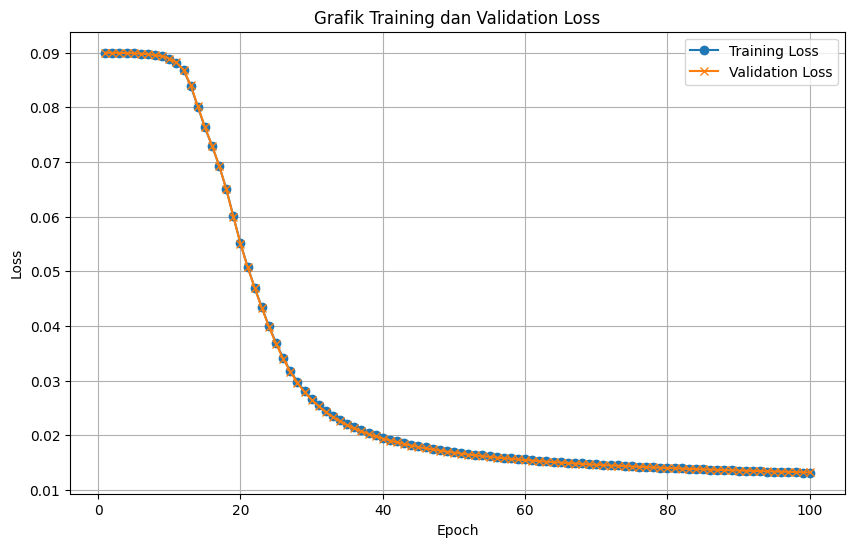

In [10]:
nn_model_a1.plot_training_loss(history_a1)

In [11]:
# Width 2: 64 neuron per layer
nn_model_a2 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

history_a2 = nn_model_a2.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_a2 = nn_model_a2.predict(X_val)
y_preds_a2 = np.argmax(y_preds_a2,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_a2)}')

Accuracy: 0.917


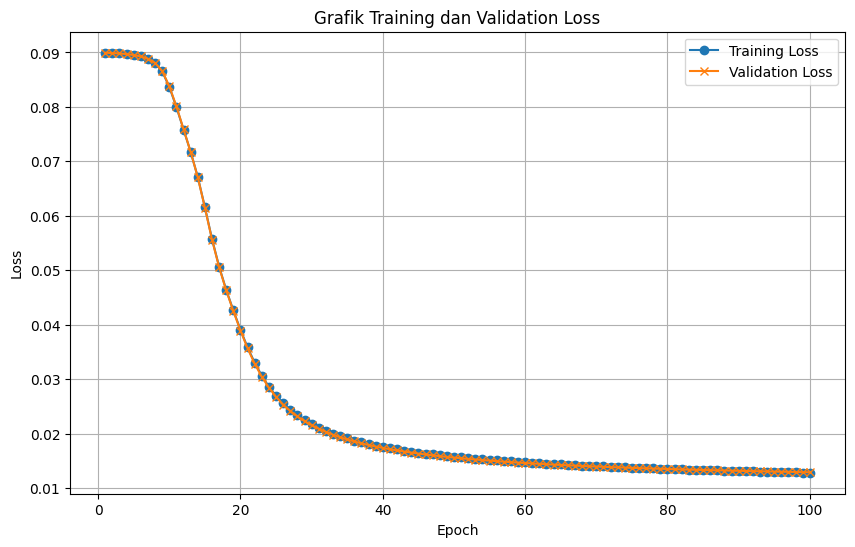

In [12]:
nn_model_a2.plot_training_loss(history_a2)

In [13]:
# Width 3: 128 neuron per layer
nn_model_3 = NeuralNetwork(
    input_size=784,
    layers_config=[(128, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

history_3 = nn_model_3.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_3 = nn_model_3.predict(X_val)
y_preds_3 = np.argmax(y_preds_3,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_3)}')

Accuracy: 0.9175


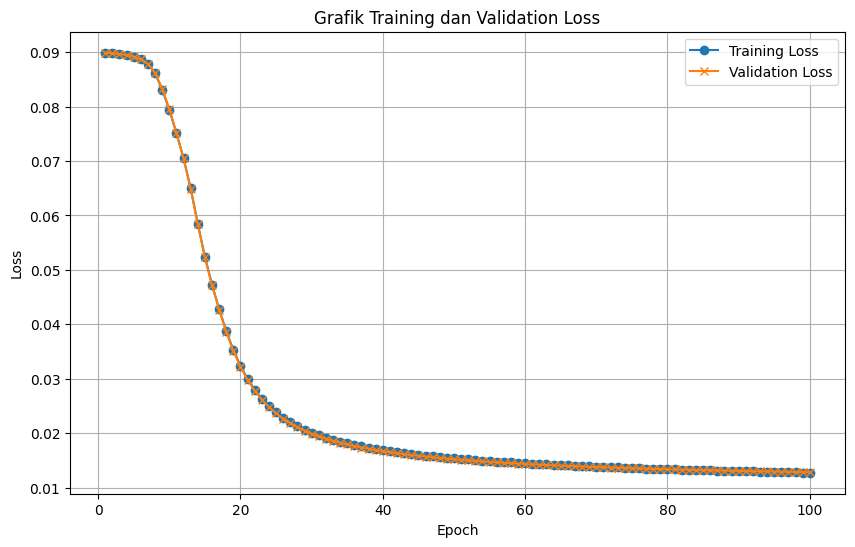

In [14]:
nn_model_3.plot_training_loss(history_3)

#### b. Width Tetap, Variasi Depth

In [15]:
# Depth 1: 1 hidden layer
nn_model_4 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_4 = nn_model_4.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_4 = nn_model_4.predict(X_val)
y_preds_4 = np.argmax(y_preds_4,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_4)}')

Accuracy: 0.917


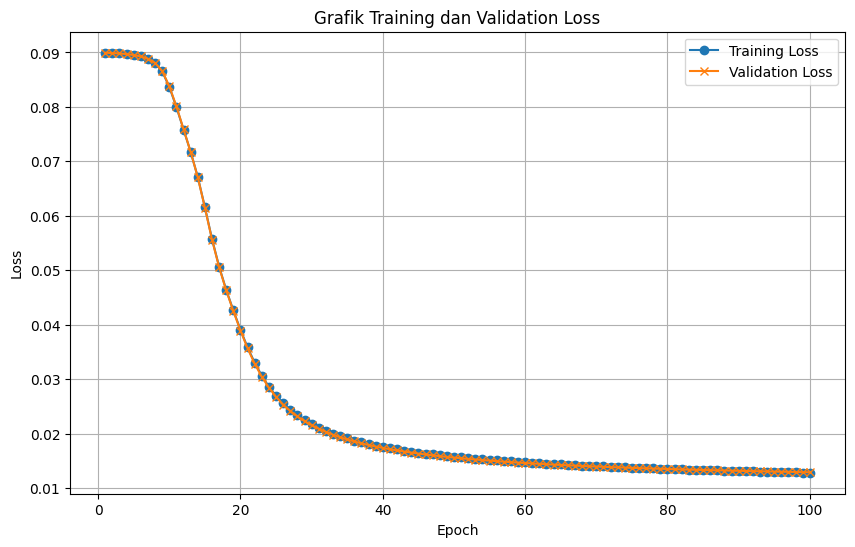

In [16]:
nn_model_4.plot_training_loss(history_4)

In [17]:
# Depth 2: 2 hidden layers
nn_model_5 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'),(64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_5 = nn_model_5.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_5 = nn_model_5.predict(X_val)
y_preds_5 = np.argmax(y_preds_5,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_5)}')

Accuracy: 0.31007142857142855


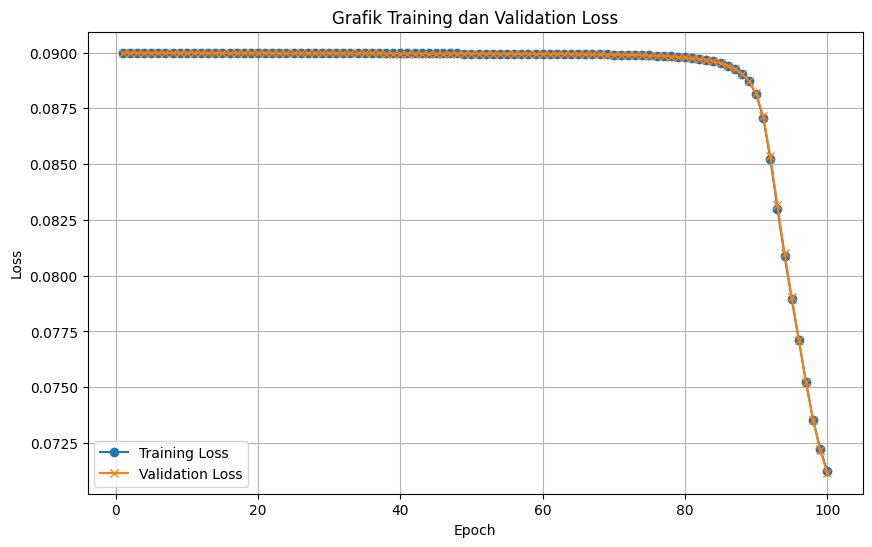

In [18]:
nn_model_5.plot_training_loss(history_5)

In [19]:
# Depth 3: 3 hidden layers
nn_model_6 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'),(64, 'linear'),(64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_6 = nn_model_6.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_6 = nn_model_6.predict(X_val)
y_preds_6 = np.argmax(y_preds_6,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_6)}')

Accuracy: 0.11428571428571428


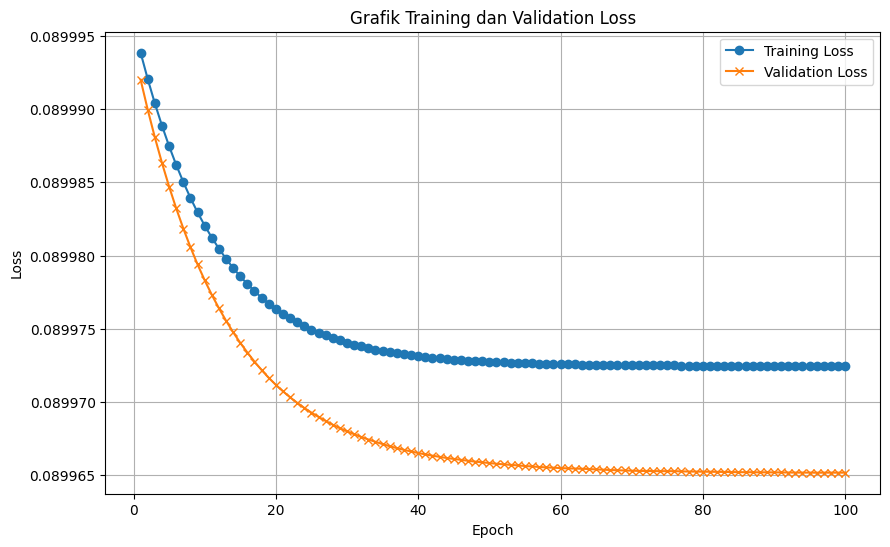

In [20]:
nn_model_6.plot_training_loss(history_6)

###  2. Pengaruh fungsi aktivasi hidden layer

In [21]:
nn_model_linear = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_linear = nn_model_linear.train(X_train, y_train, X_val, y_val,
                                   batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_linear = nn_model_linear.predict(X_val)
y_preds_linear = np.argmax(y_preds_linear, axis=1)
print(f'Linear Accuracy: {accuracy_score(y_val_raw, y_preds_linear)}')

Linear Accuracy: 0.9141428571428571


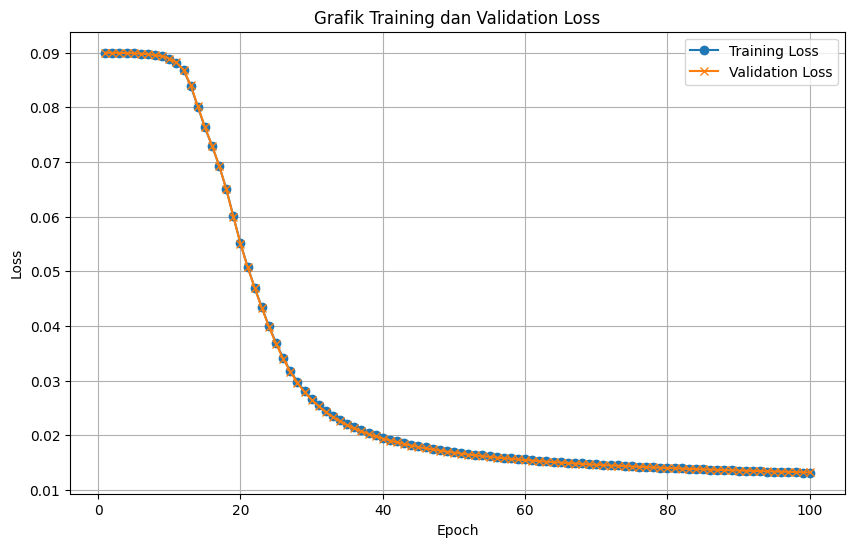

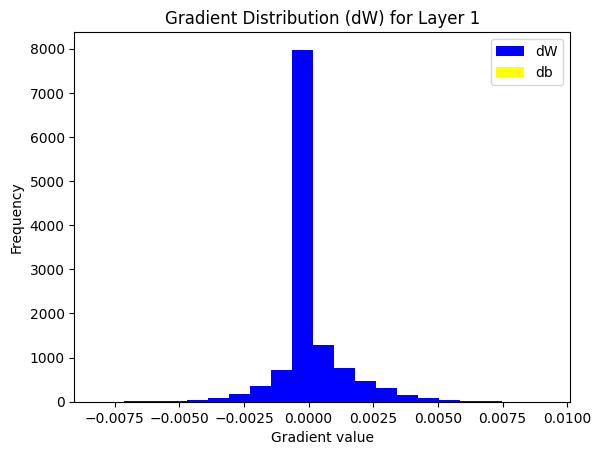

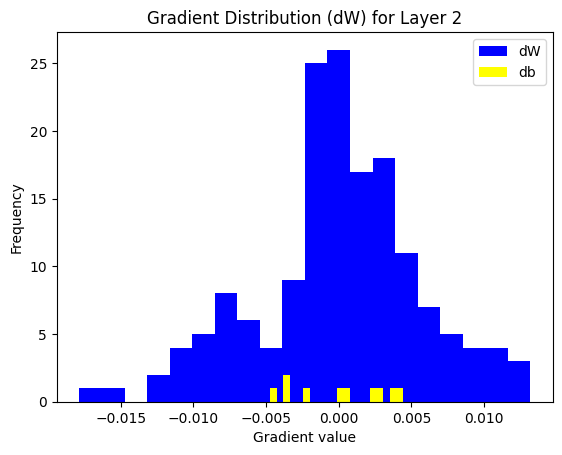

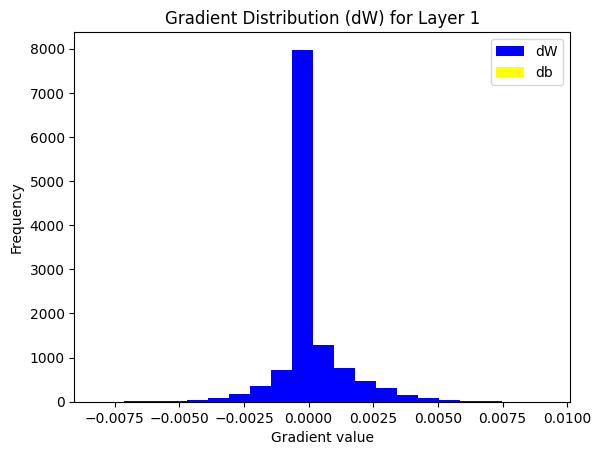

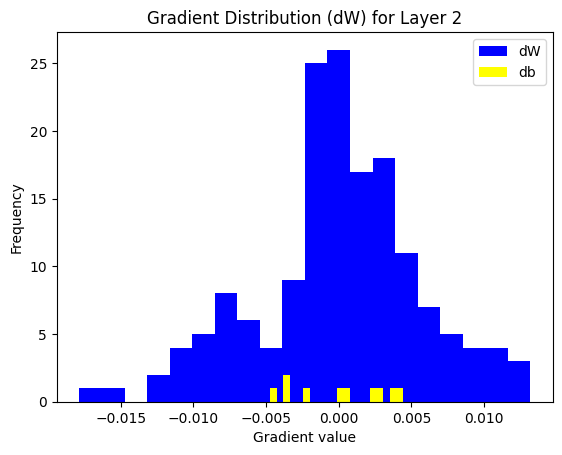

In [22]:
nn_model_linear.plot_training_loss(history_linear)
nn_model_linear.plot_gradient_distribution([0,1])
nn_model_linear.plot_gradient_distribution([0,1])

In [23]:
nn_model_relu = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'relu'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_relu = nn_model_relu.train(X_train, y_train, X_val, y_val,
                                   batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_relu = nn_model_relu.predict(X_val)
y_preds_relu = np.argmax(y_preds_relu, axis=1)
print(f'ReLU Accuracy: {accuracy_score(y_val_raw, y_preds_relu)}')

ReLU Accuracy: 0.9164285714285715


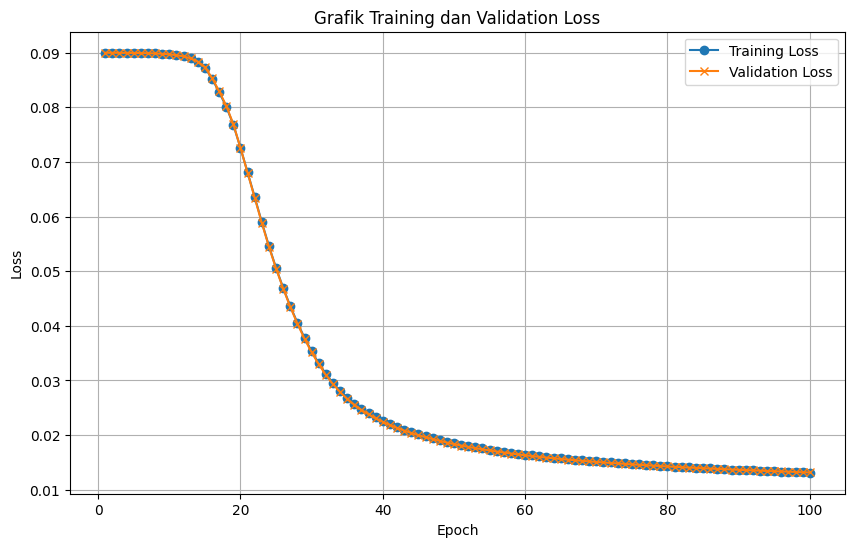

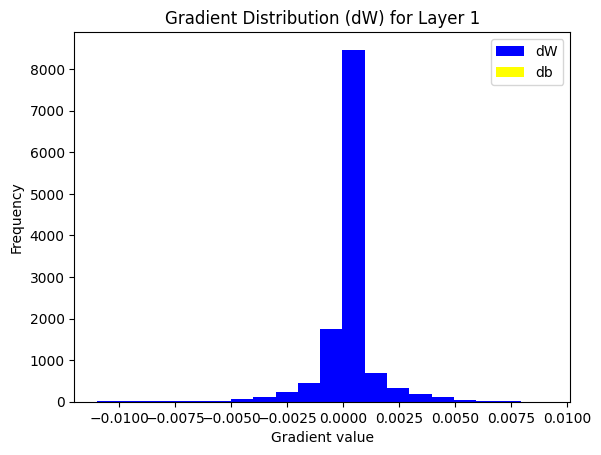

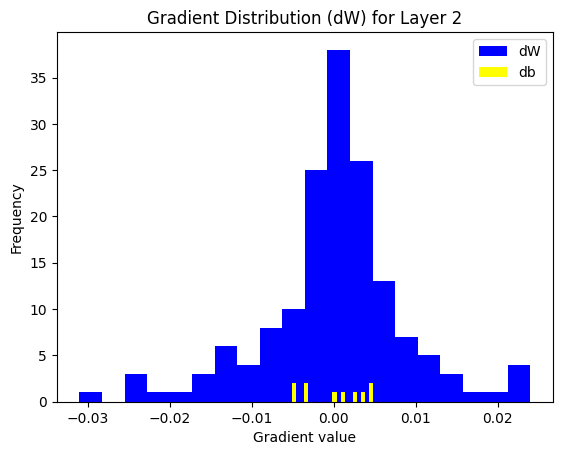

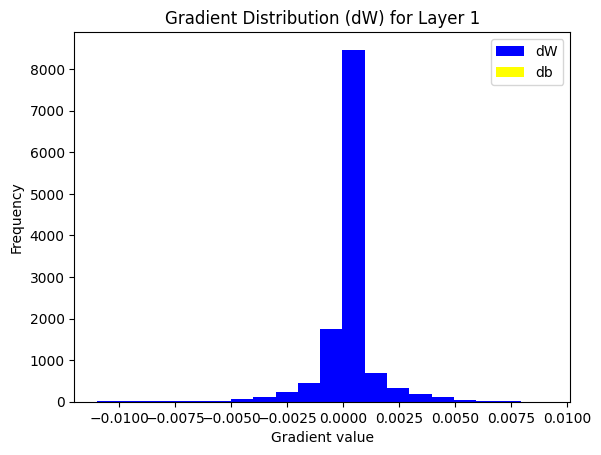

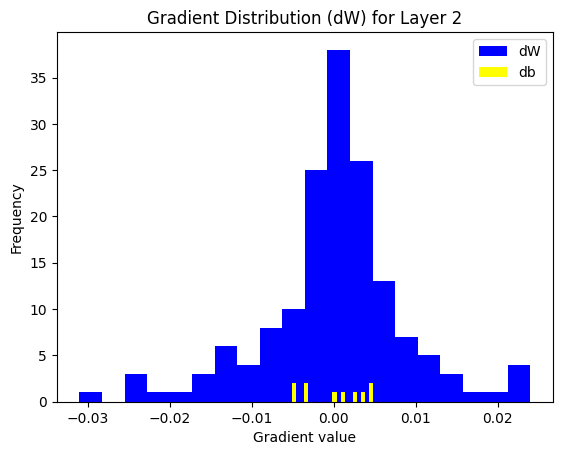

In [24]:
nn_model_relu.plot_training_loss(history_relu)
nn_model_relu.plot_gradient_distribution([0,1])
nn_model_relu.plot_gradient_distribution([0,1])

In [25]:
nn_model_leaky_relu = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'leaky_relu'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_leaky_relu = nn_model_leaky_relu.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_leaky_relu = nn_model_leaky_relu.predict(X_val)
y_preds_leaky_relu = np.argmax(y_preds_leaky_relu, axis=1)
print(f'leaky_relu Accuracy: {accuracy_score(y_val_raw, y_preds_leaky_relu)}')

leaky_relu Accuracy: 0.9165714285714286


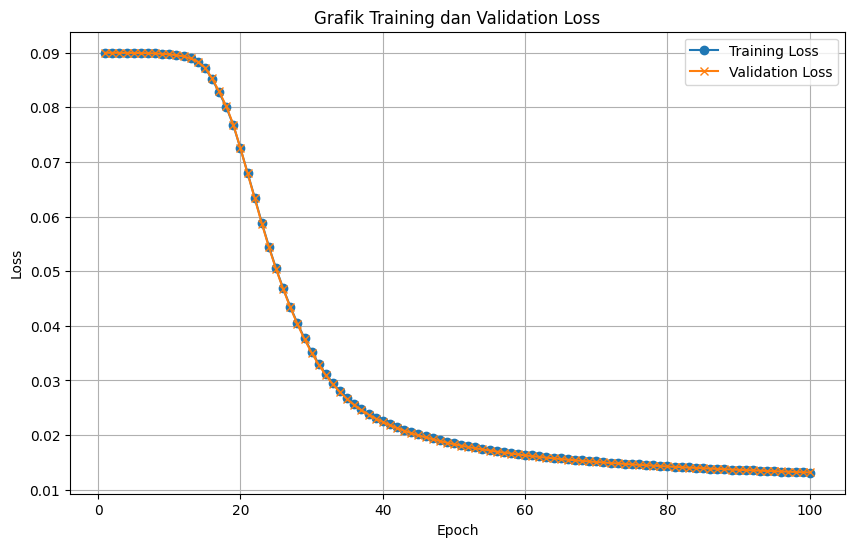

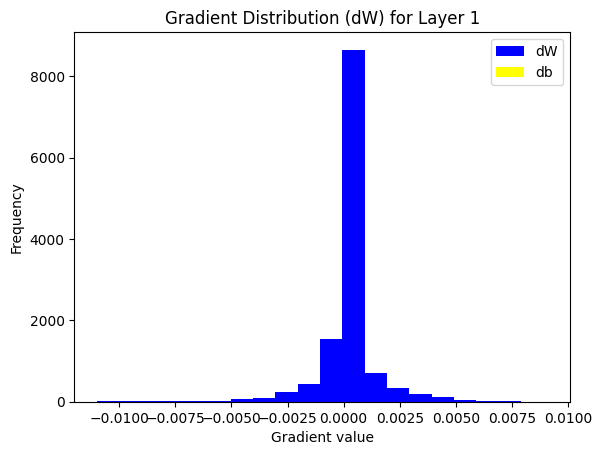

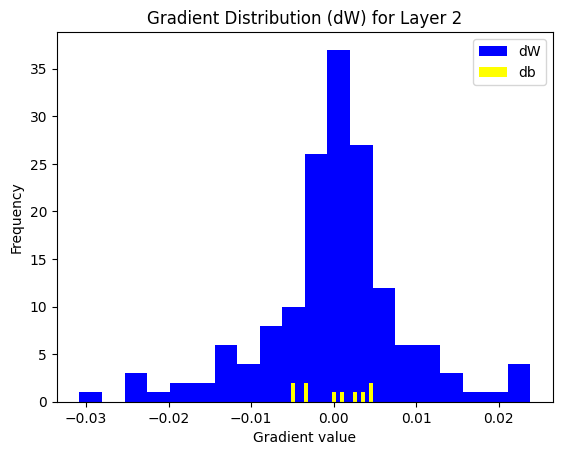

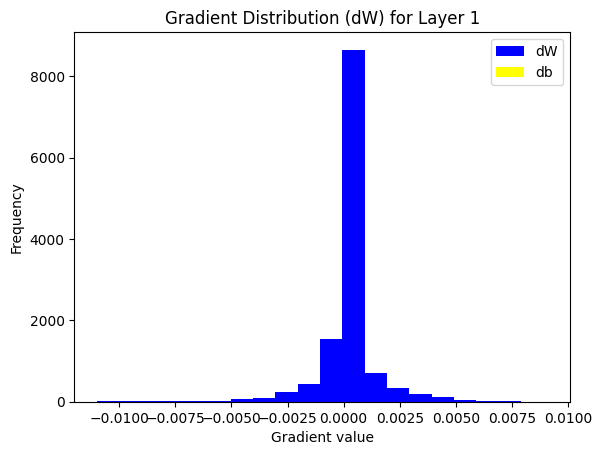

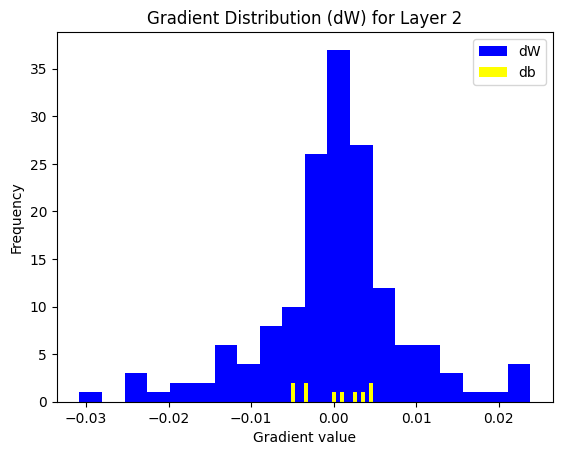

In [26]:
nn_model_leaky_relu.plot_training_loss(history_leaky_relu)
nn_model_leaky_relu.plot_gradient_distribution([0,1])
nn_model_leaky_relu.plot_gradient_distribution([0,1])

In [27]:
nn_model_elu = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'elu'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_elu = nn_model_elu.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_elu = nn_model_elu.predict(X_val)
y_preds_elu = np.argmax(y_preds_elu, axis=1)
print(f'elu Accuracy: {accuracy_score(y_val_raw, y_preds_elu)}')

elu Accuracy: 0.9166428571428571


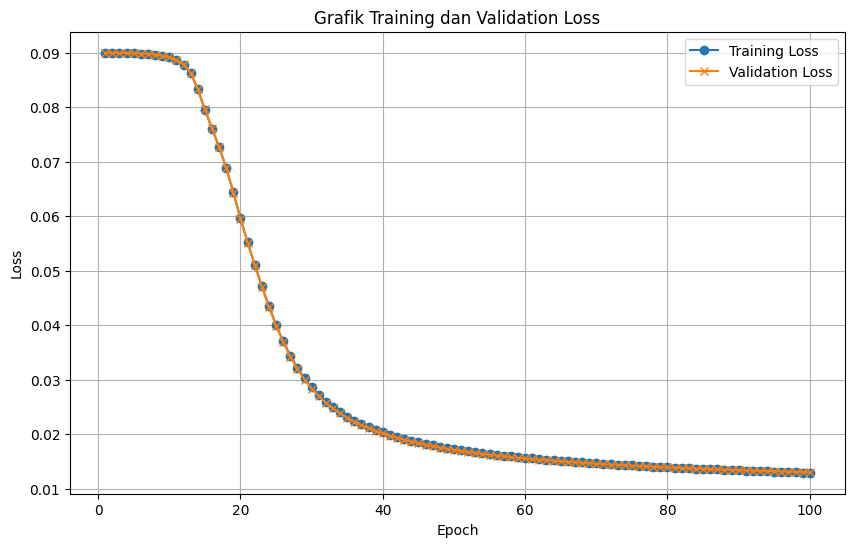

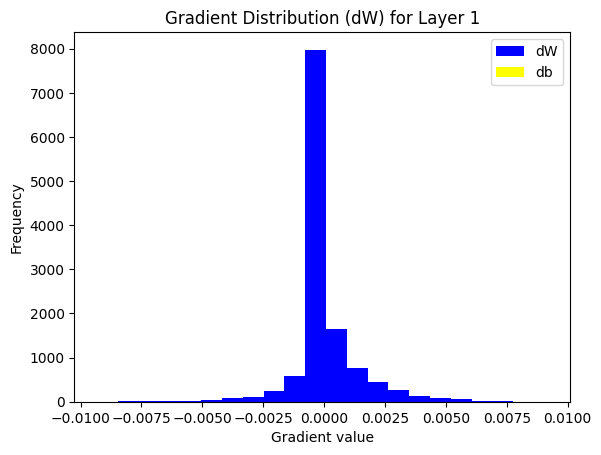

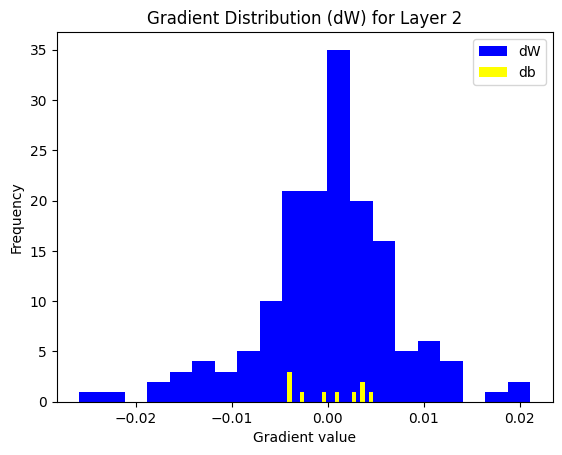

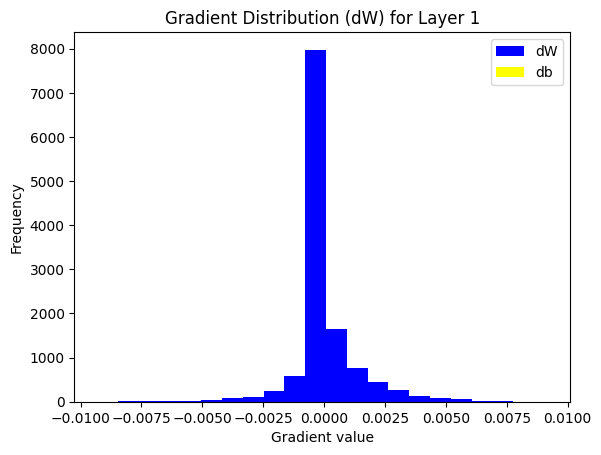

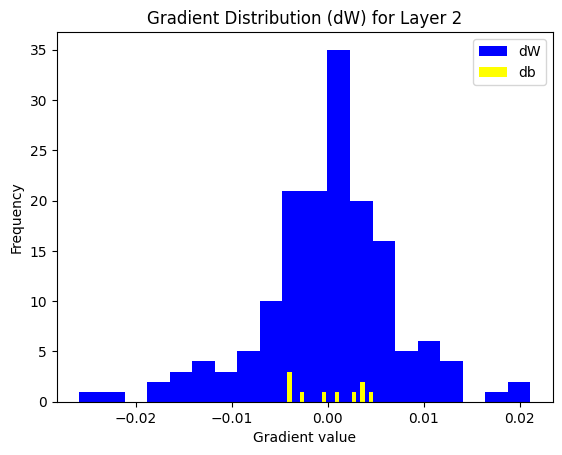

In [28]:
nn_model_elu.plot_training_loss(history_elu)
nn_model_elu.plot_gradient_distribution([0,1])
nn_model_elu.plot_gradient_distribution([0,1])

In [29]:
nn_model_swish = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'swish'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_swish = nn_model_swish.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_swish = nn_model_swish.predict(X_val)
y_preds_swish = np.argmax(y_preds_swish, axis=1)
print(f'swish Accuracy: {accuracy_score(y_val_raw, y_preds_swish)}')

swish Accuracy: 0.9135


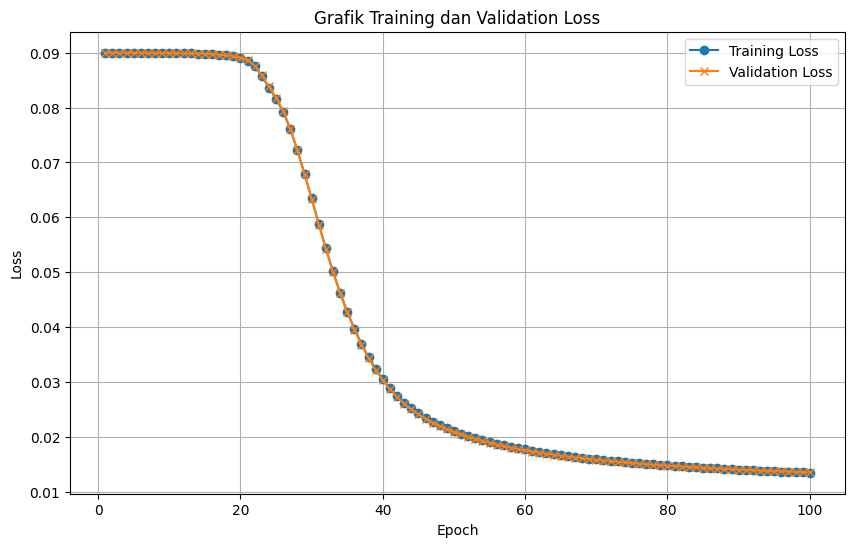

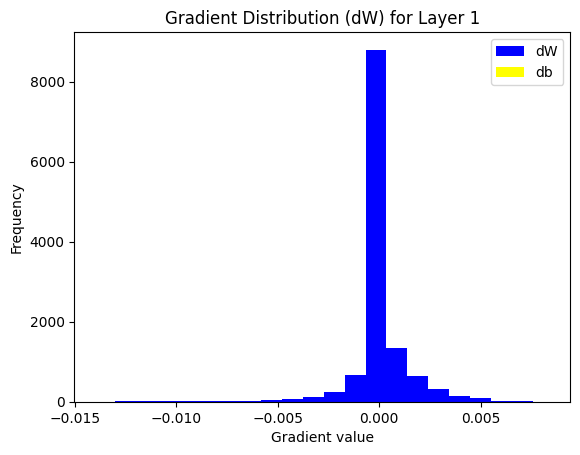

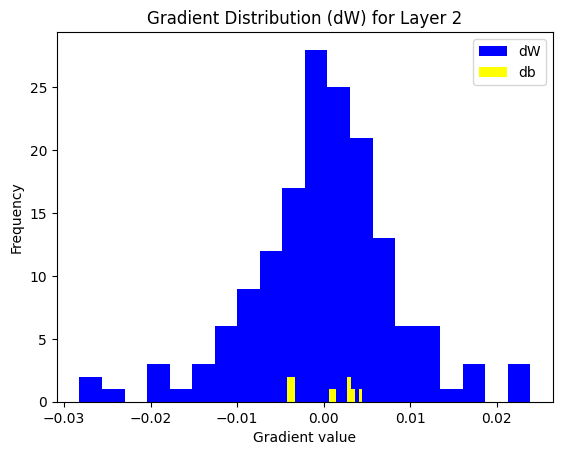

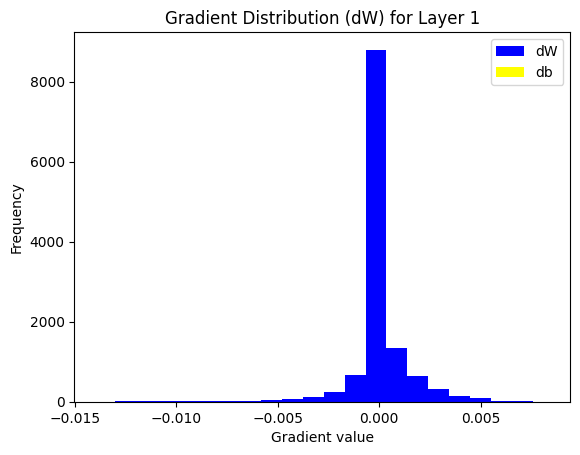

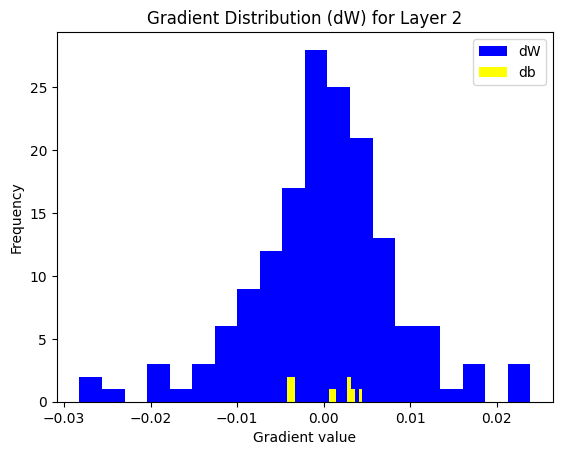

In [30]:
nn_model_swish.plot_training_loss(history_swish)
nn_model_swish.plot_gradient_distribution([0,1])
nn_model_swish.plot_gradient_distribution([0,1])

In [31]:
nn_model_sigmoid = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'sigmoid'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_sigmoid = nn_model_sigmoid.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_sigmoid = nn_model_sigmoid.predict(X_val)
y_preds_sigmoid = np.argmax(y_preds_sigmoid, axis=1)
print(f'Sigmoid Accuracy: {accuracy_score(y_val_raw, y_preds_sigmoid)}')

Sigmoid Accuracy: 0.5057142857142857


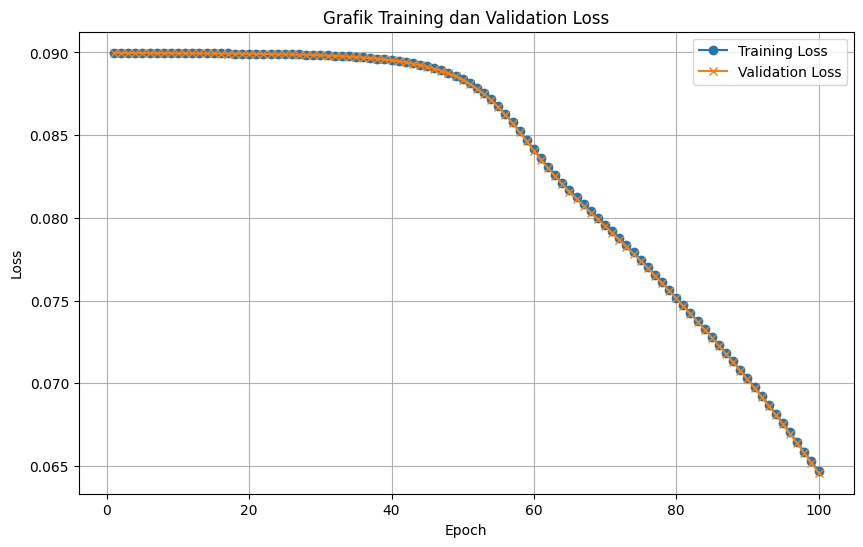

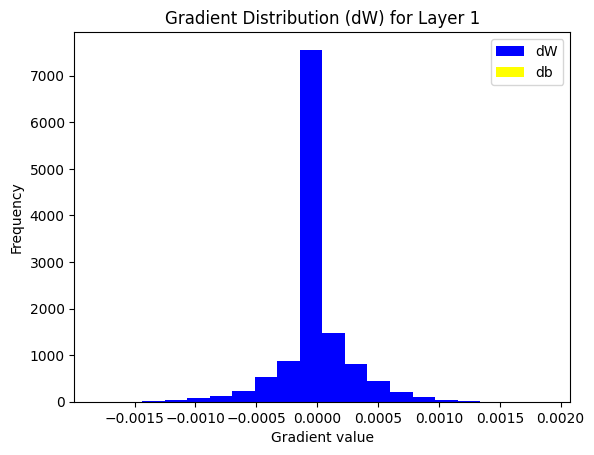

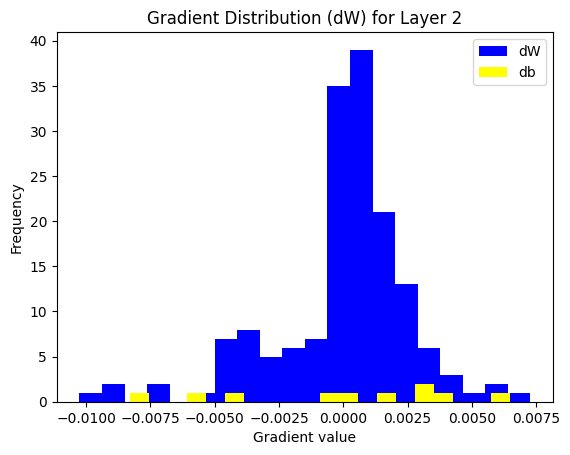

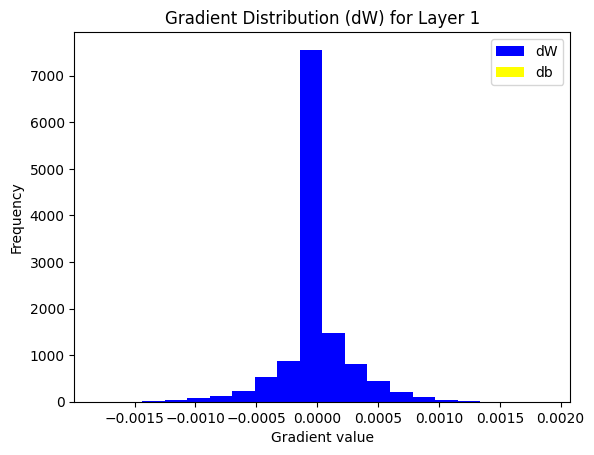

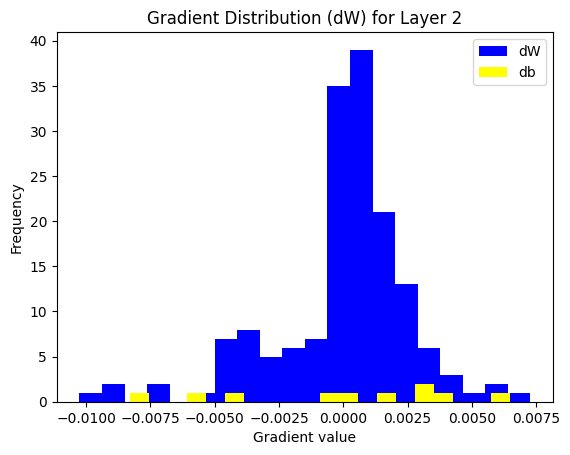

In [32]:
nn_model_sigmoid.plot_training_loss(history_sigmoid)
nn_model_sigmoid.plot_gradient_distribution([0,1])
nn_model_sigmoid.plot_gradient_distribution([0,1])

In [33]:
nn_model_tanh = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'tanh'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_tanh = nn_model_tanh.train(X_train, y_train, X_val, y_val,
                                   batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_tanh = nn_model_tanh.predict(X_val)
y_preds_tanh = np.argmax(y_preds_tanh, axis=1)
print(f'Tanh Accuracy: {accuracy_score(y_val_raw, y_preds_tanh)}')

Tanh Accuracy: 0.9162857142857143


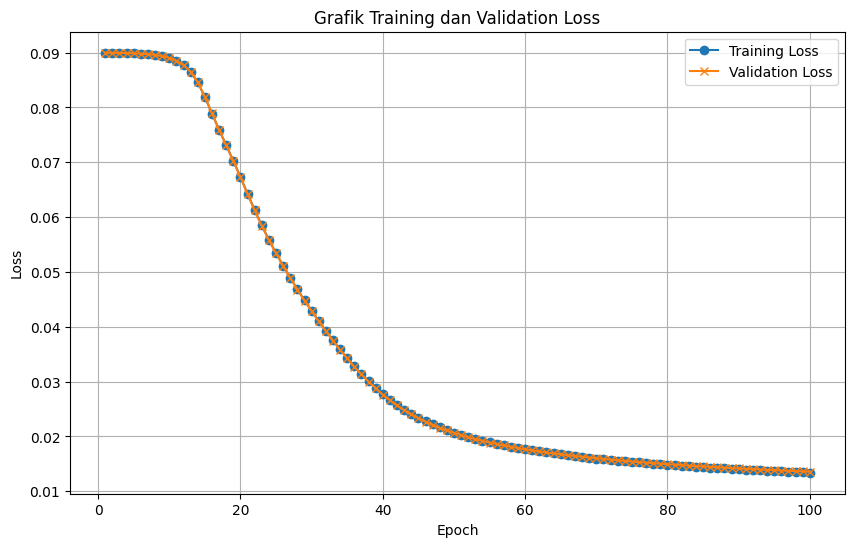

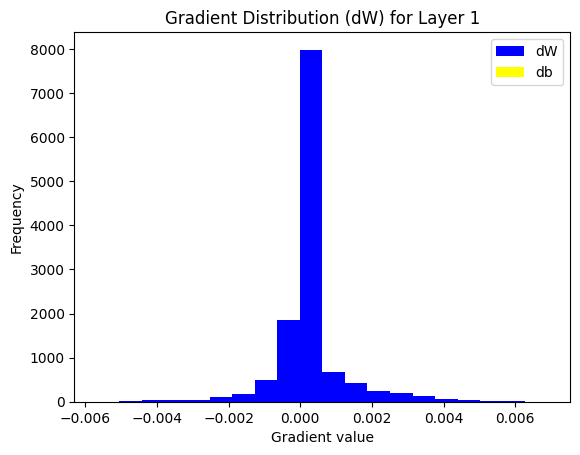

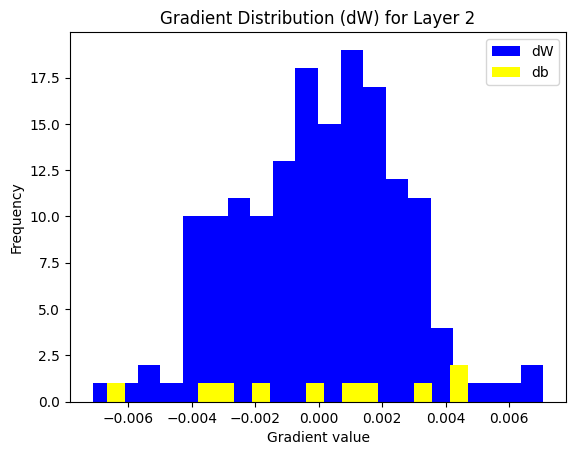

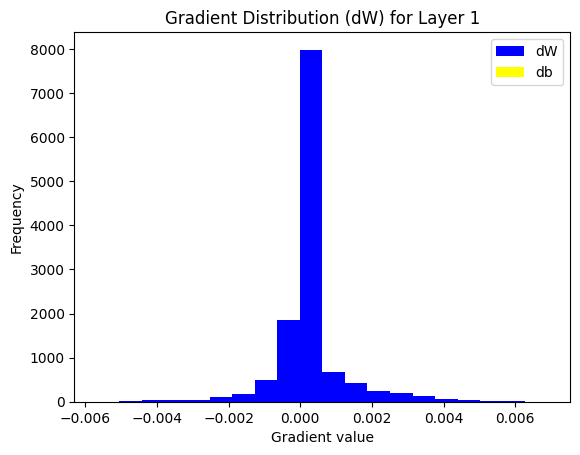

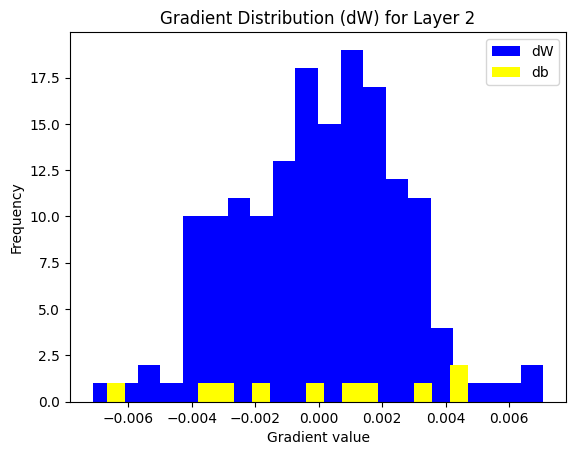

In [34]:
nn_model_tanh.plot_training_loss(history_tanh)
nn_model_tanh.plot_gradient_distribution([0,1])
nn_model_tanh.plot_gradient_distribution([0,1])

### 3. Pengaruh Learning Rate

In [35]:
nn_model_lr1 = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_lr1 = nn_model_lr1.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.1, max_epoch=100, verbose=0)
y_preds_lr1 = nn_model_lr1.predict(X_val)
y_preds_lr1 = np.argmax(y_preds_lr1, axis=1)
print(f'Learning Rate 0.1 Accuracy: {accuracy_score(y_val_raw, y_preds_lr1)}')

Learning Rate 0.1 Accuracy: 0.9301428571428572


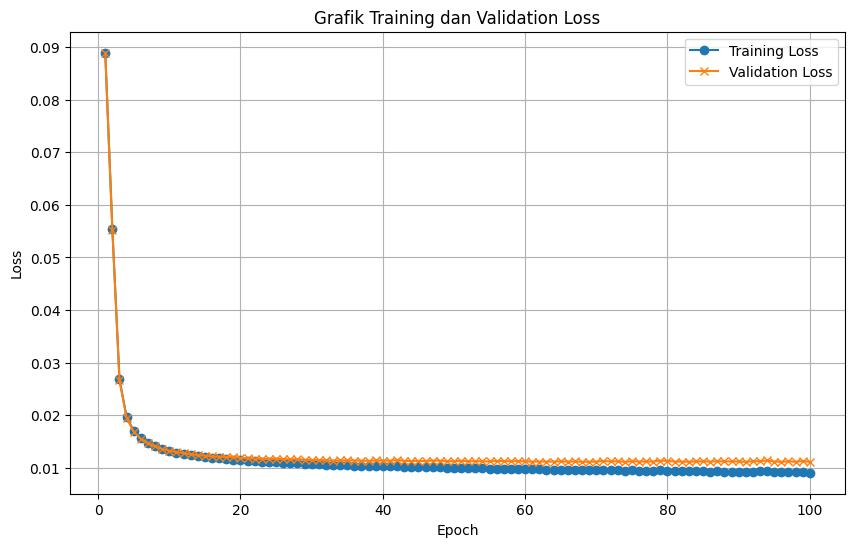

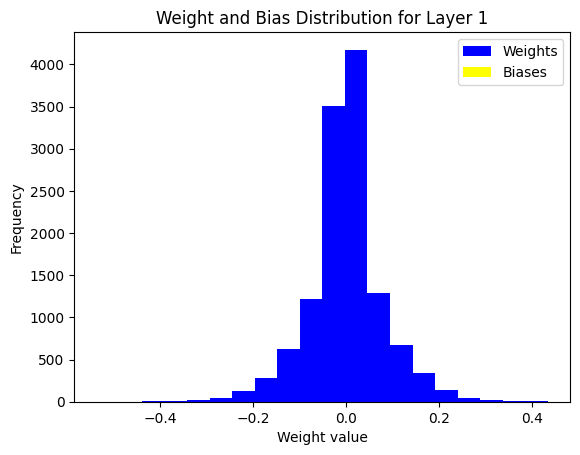

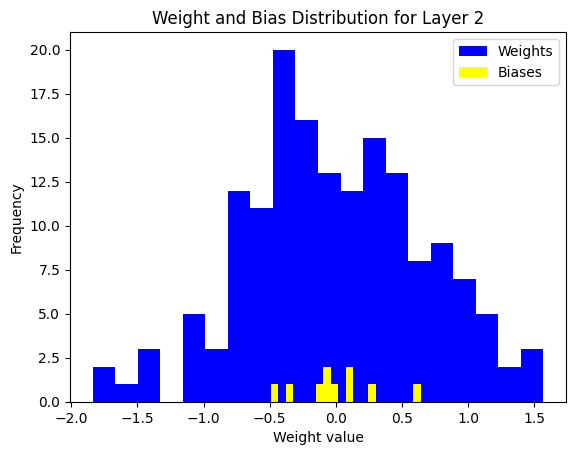

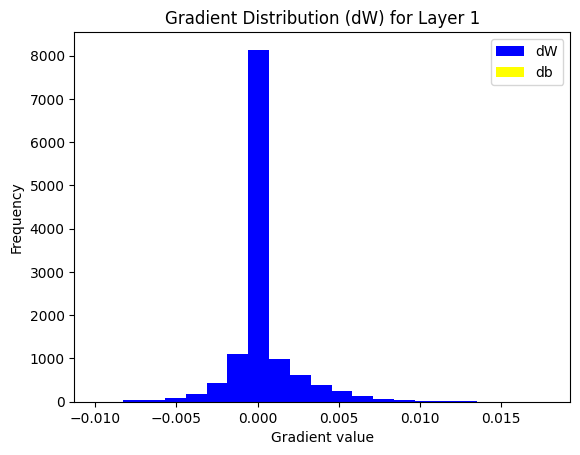

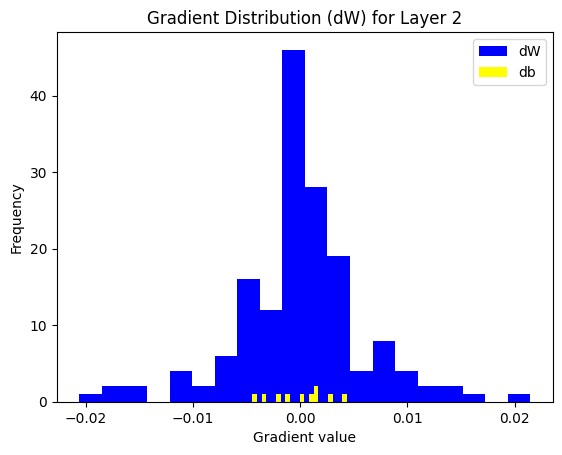

In [36]:
nn_model_lr1.plot_training_loss(history_lr1)
nn_model_lr1.plot_weight_distribution([0,1])
nn_model_lr1.plot_gradient_distribution([0,1])

In [37]:
nn_model_lr2 = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_lr2 = nn_model_lr2.train(X_train, y_train, X_val, y_val,
                                             batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_lr2 = nn_model_lr2.predict(X_val)
y_preds_lr2 = np.argmax(y_preds_lr2, axis=1)
print(f'Learning Rate 0.01 Accuracy: {accuracy_score(y_val_raw, y_preds_lr2)}')

Learning Rate 0.01 Accuracy: 0.9141428571428571


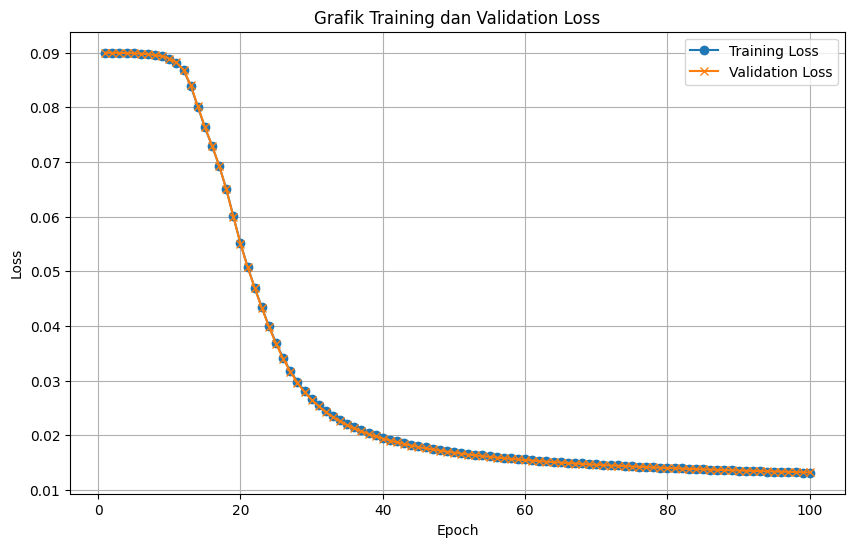

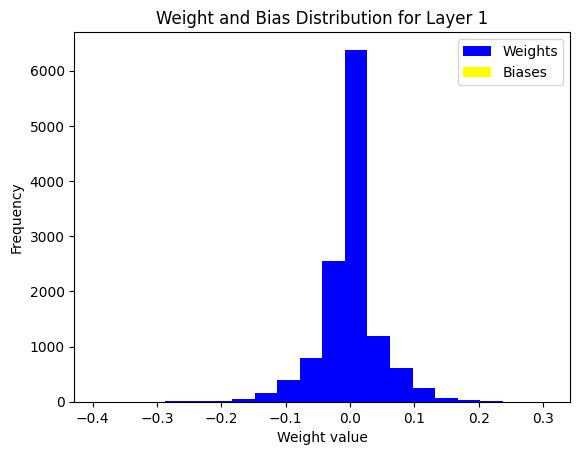

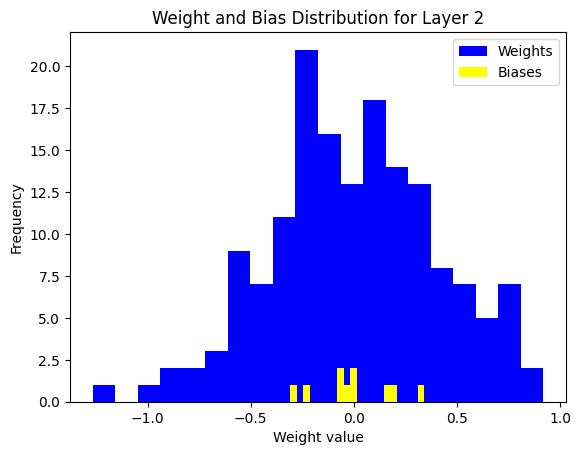

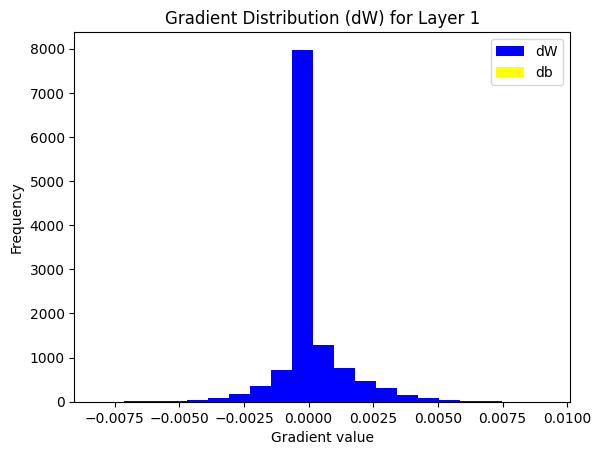

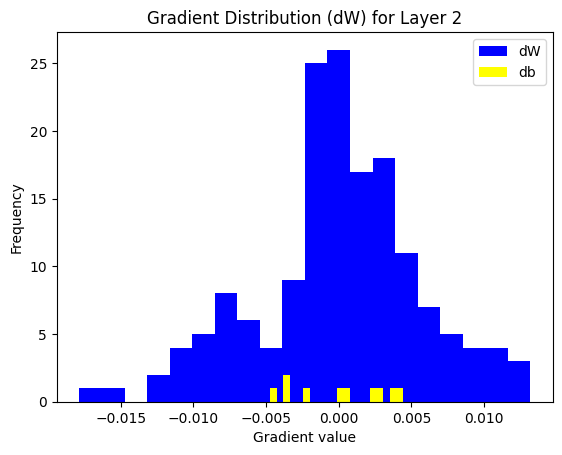

In [38]:
nn_model_lr2.plot_training_loss(history_lr2)
nn_model_lr2.plot_weight_distribution([0,1])
nn_model_lr2.plot_gradient_distribution([0,1])

In [39]:
nn_model_lr3 = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_lr3 = nn_model_lr3.train(X_train, y_train, X_val, y_val,
                                       batch_size=128, learning_rate=0.001, max_epoch=100, verbose=0)
y_preds_lr3 = nn_model_lr3.predict(X_val)
y_preds_lr3 = np.argmax(y_preds_lr3, axis=1)
print(f'Learning Rate 0.001 Accuracy: {accuracy_score(y_val_raw, y_preds_lr3)}')

Learning Rate 0.001 Accuracy: 0.2735714285714286


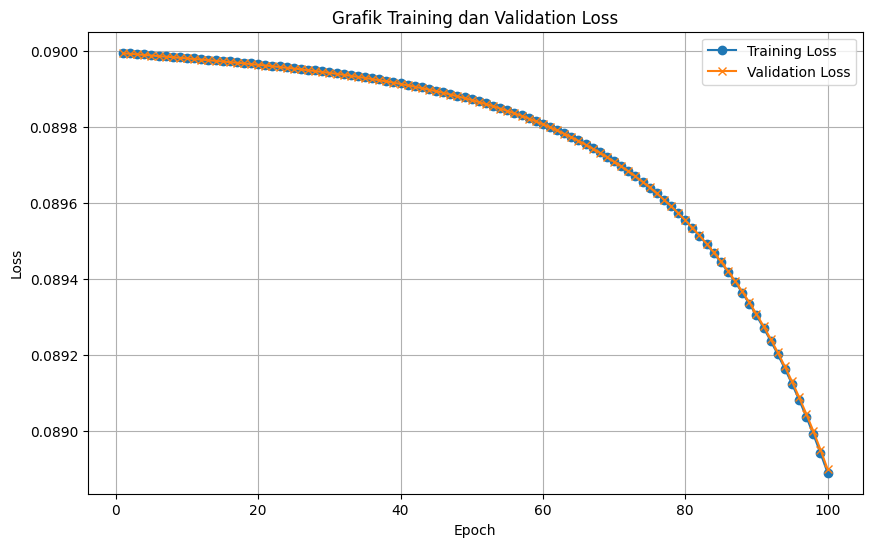

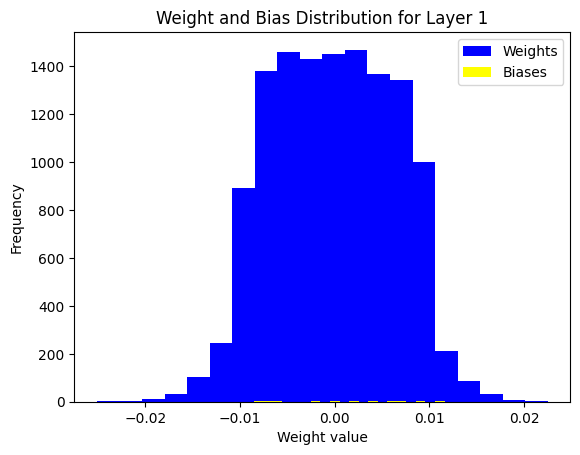

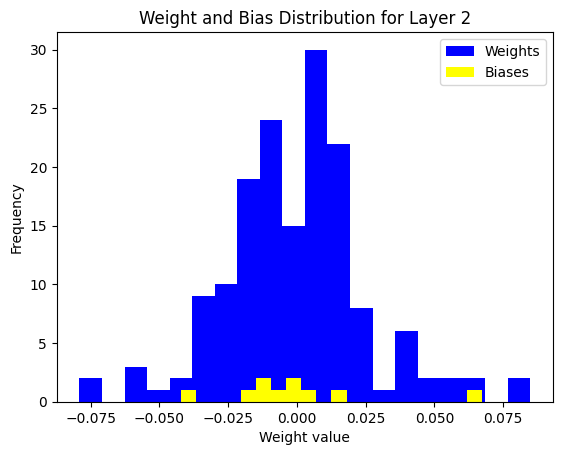

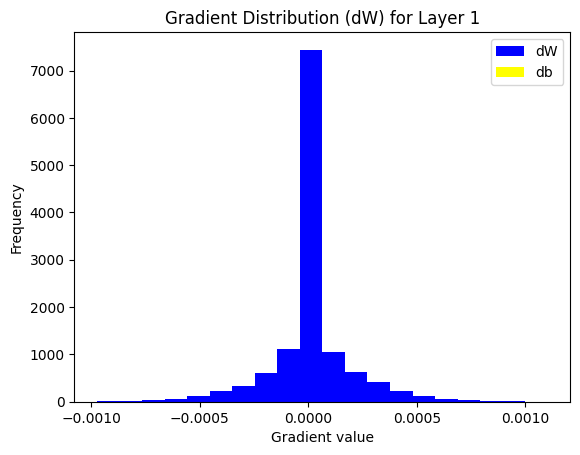

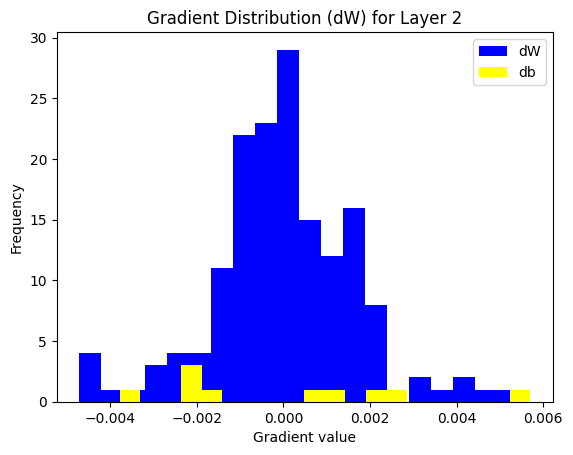

In [40]:
nn_model_lr3.plot_training_loss(history_lr3)
nn_model_lr3.plot_weight_distribution([0,1])
nn_model_lr3.plot_gradient_distribution([0,1])

### 4. Pengaruh Inisialisasi Bobot

In [41]:
nn_model_zero = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='zero'
)
history_zero = nn_model_zero.train(X_train, y_train, X_val, y_val,
                                   batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_zero = nn_model_zero.predict(X_val)
y_preds_zero = np.argmax(y_preds_zero, axis=1)
print(f'Zero Initialization Accuracy: {accuracy_score(y_val_raw, y_preds_zero)}')


Zero Initialization Accuracy: 0.11428571428571428


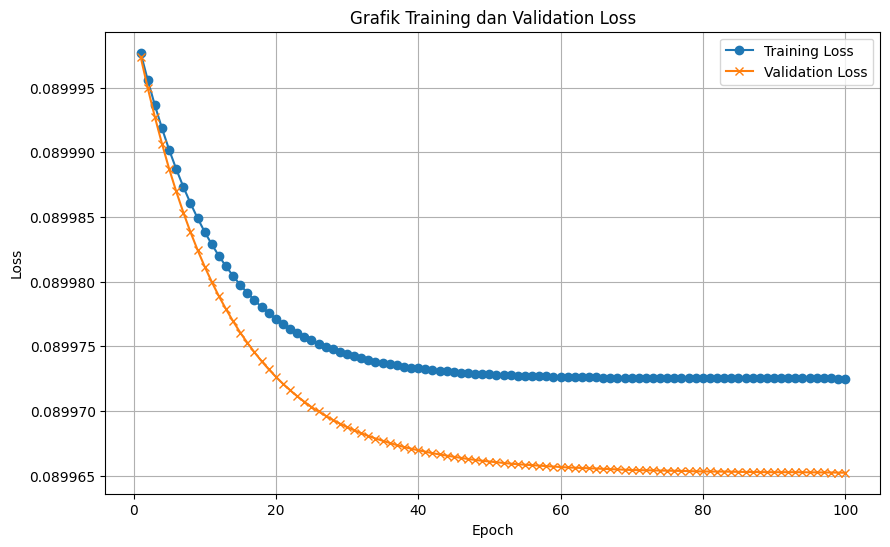

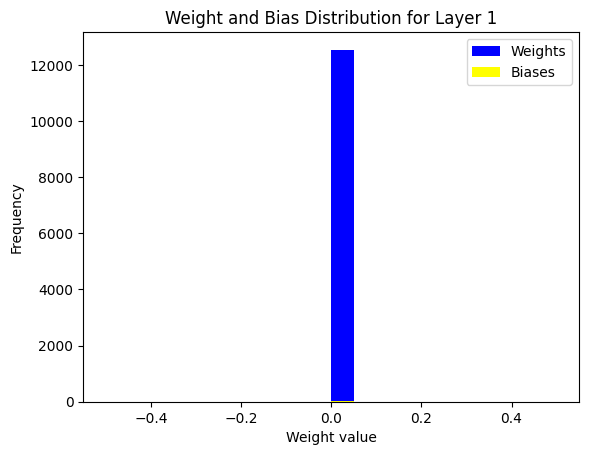

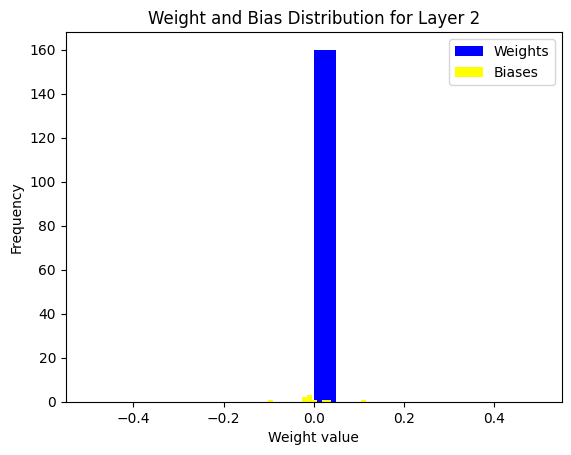

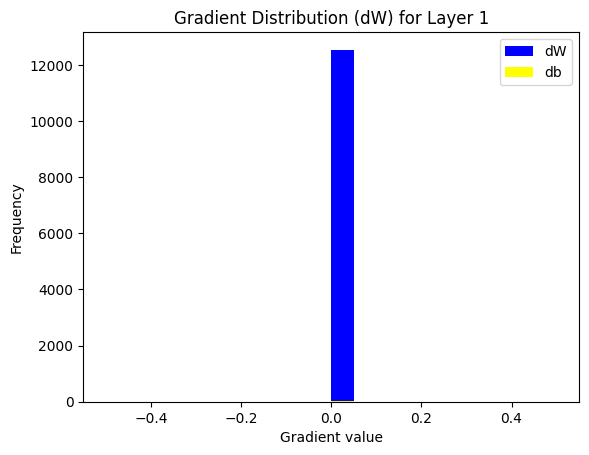

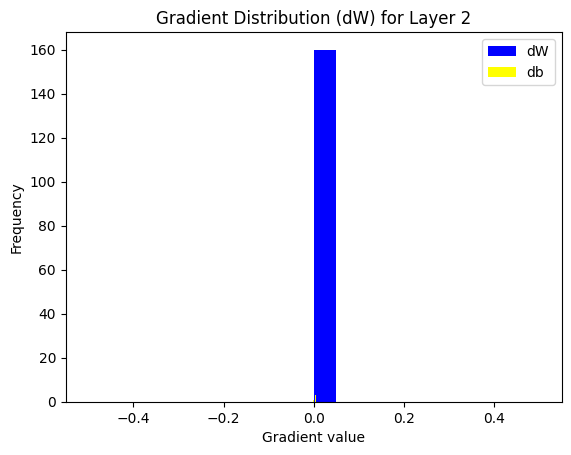

In [42]:
nn_model_zero.plot_training_loss(history_zero)
nn_model_zero.plot_weight_distribution([0,1])
nn_model_zero.plot_gradient_distribution([0,1])

In [43]:
nn_model_uniform = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_uniform = nn_model_uniform.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_uniform = nn_model_uniform.predict(X_val)
y_preds_uniform = np.argmax(y_preds_uniform, axis=1)
print(f'Random Uniform Initialization Accuracy: {accuracy_score(y_val_raw, y_preds_uniform)}')

Random Uniform Initialization Accuracy: 0.9141428571428571


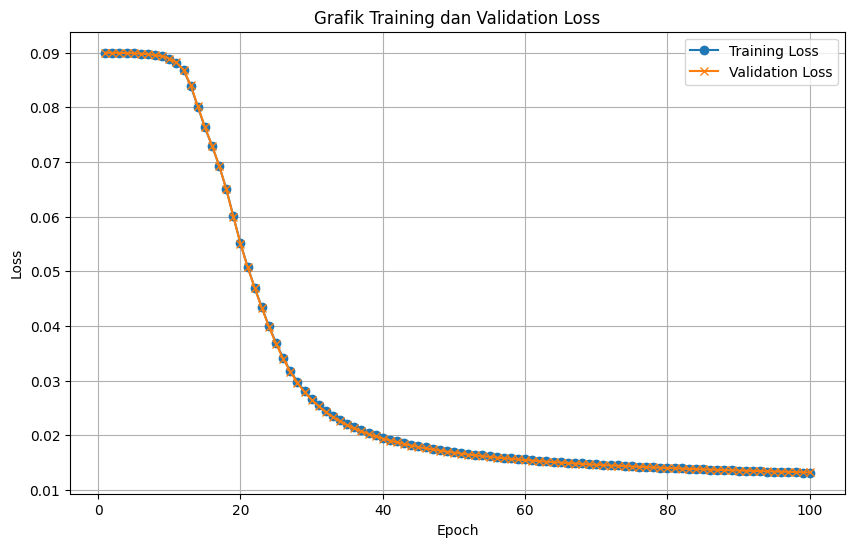

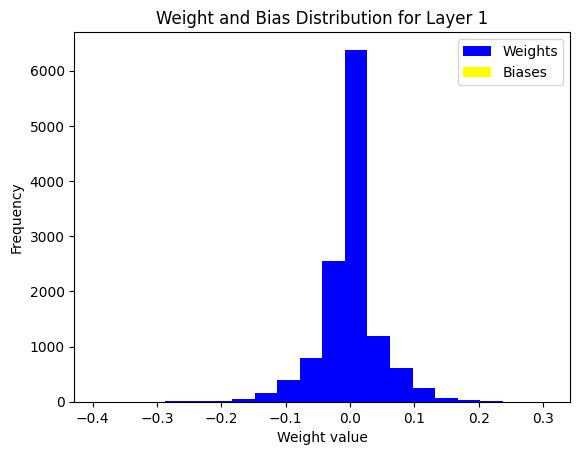

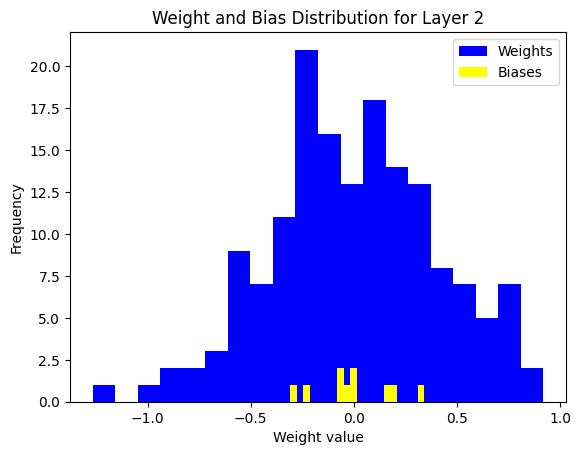

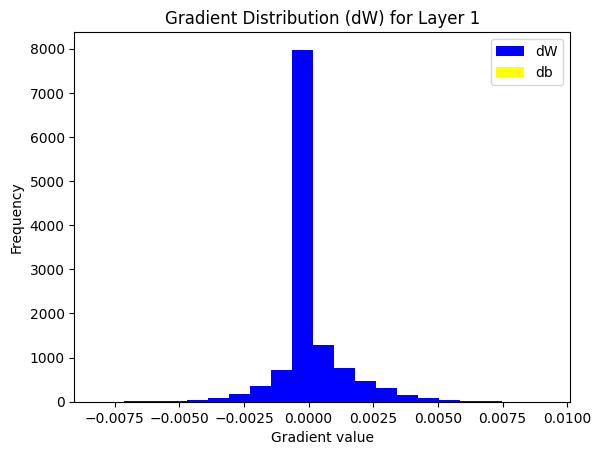

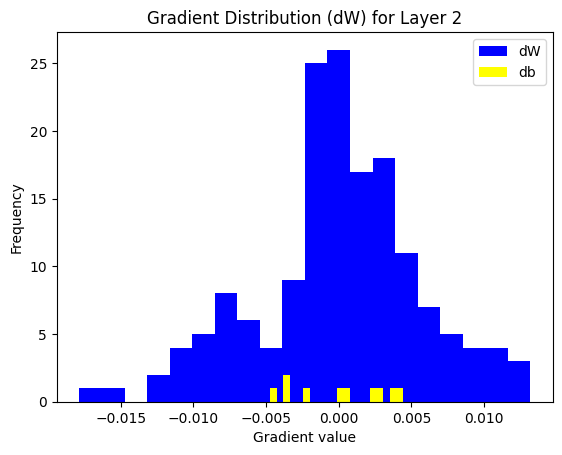

In [44]:
nn_model_uniform.plot_training_loss(history_uniform)
nn_model_uniform.plot_weight_distribution([0,1])
nn_model_uniform.plot_gradient_distribution([0,1])

In [45]:
nn_model_normal = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_normal',
    weight_init_params={'mean': 0.0, 'variance': 0.01, 'seed': 42}
)
history_normal = nn_model_normal.train(X_train, y_train, X_val, y_val,
                                       batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_normal = nn_model_normal.predict(X_val)
y_preds_normal = np.argmax(y_preds_normal, axis=1)
print(f'Random Normal Initialization Accuracy: {accuracy_score(y_val_raw, y_preds_normal)}')

Random Normal Initialization Accuracy: 0.9134285714285715


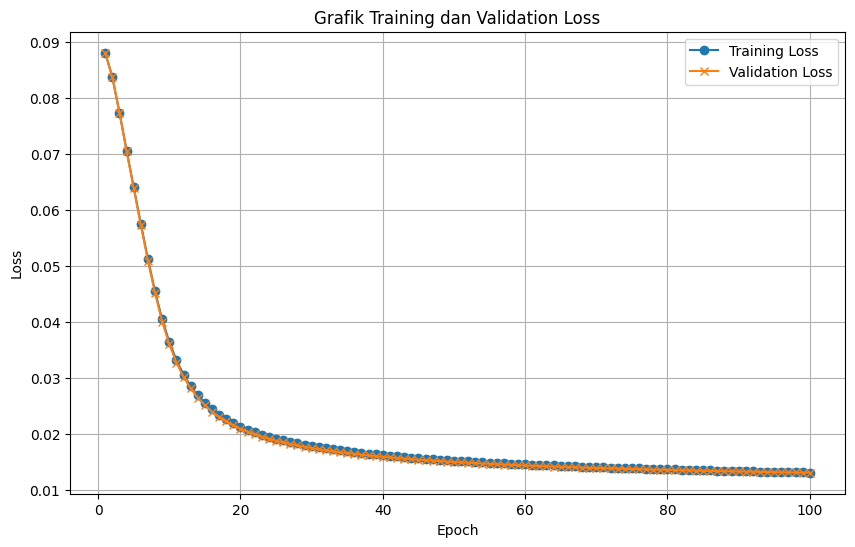

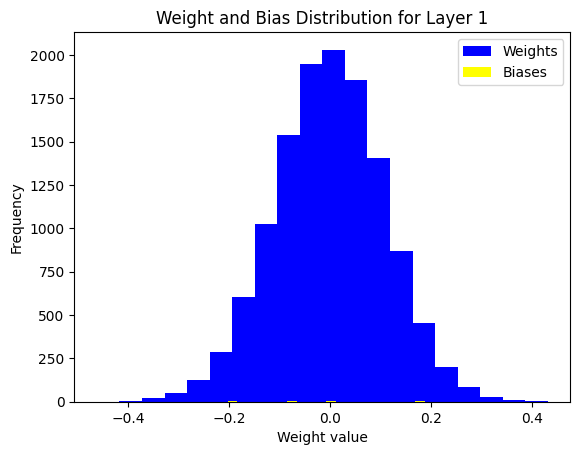

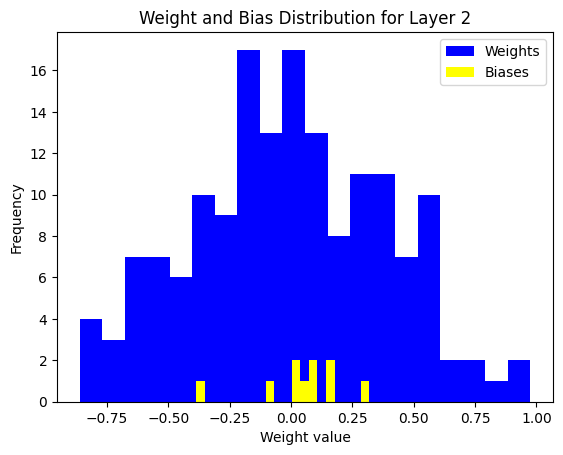

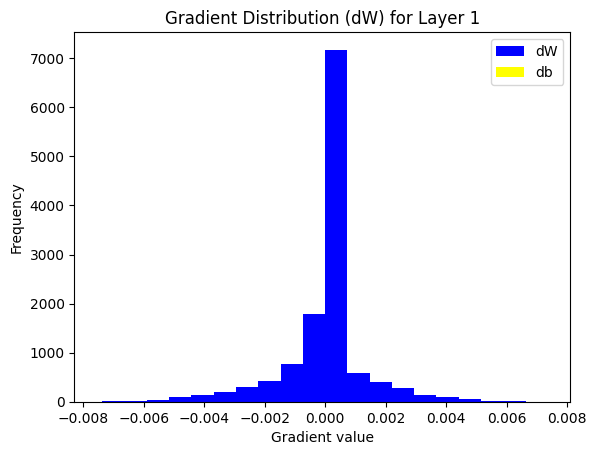

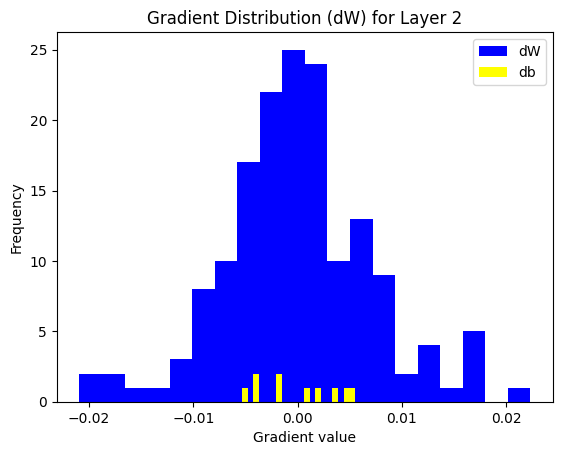

In [46]:
nn_model_normal.plot_training_loss(history_normal)
nn_model_normal.plot_weight_distribution([0,1])
nn_model_normal.plot_gradient_distribution([0,1])

In [47]:
nn_model_xavier = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='xavier',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_xavier = nn_model_xavier.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_xavier = nn_model_xavier.predict(X_val)
y_preds_xavier = np.argmax(y_preds_xavier, axis=1)
print(f'Xavier Initialization Accuracy: {accuracy_score(y_val_raw, y_preds_xavier)}')

Xavier Initialization Accuracy: 0.919


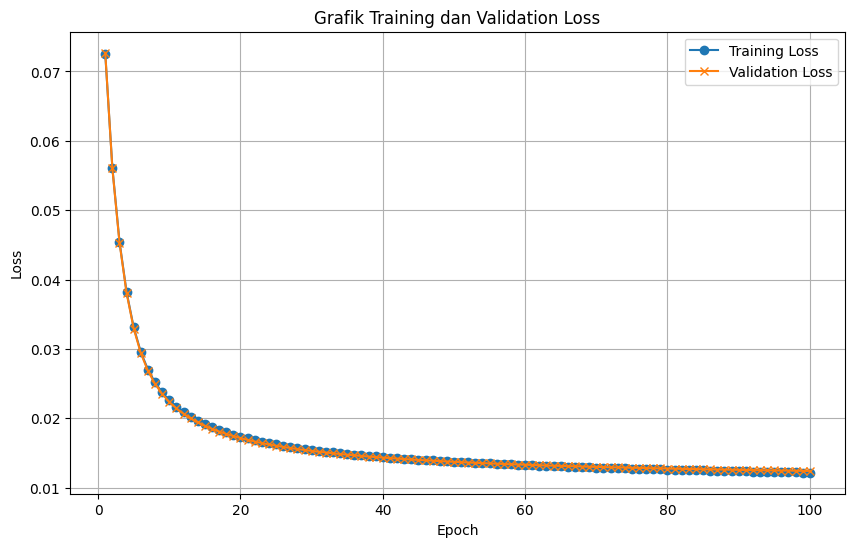

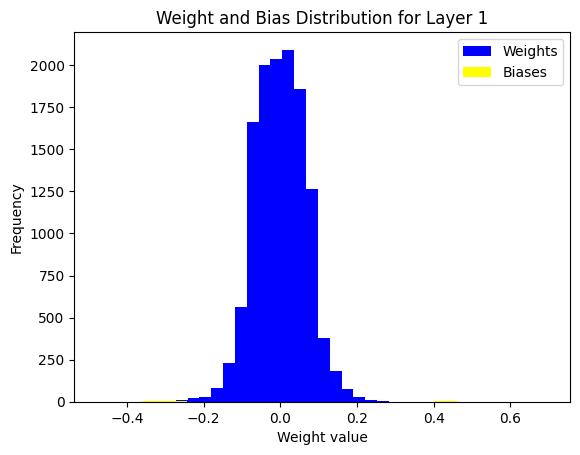

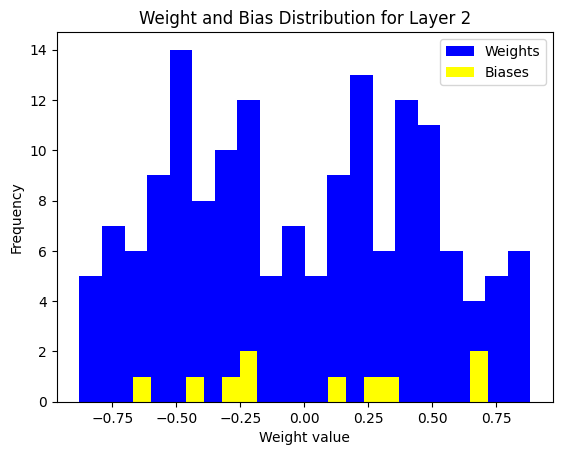

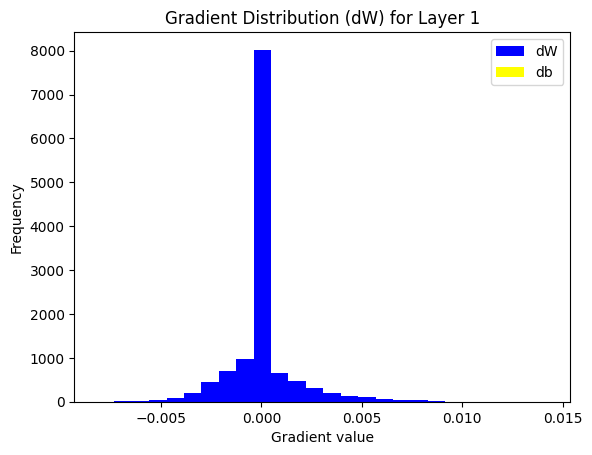

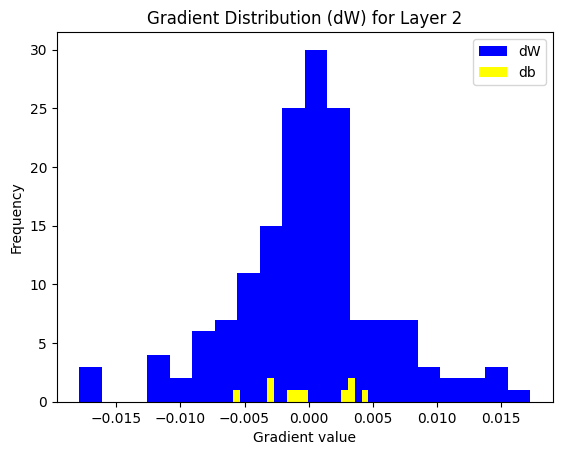

In [48]:
nn_model_xavier.plot_training_loss(history_xavier)
nn_model_xavier.plot_weight_distribution([0,1])
nn_model_xavier.plot_gradient_distribution([0,1])

In [49]:
nn_model_he = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='he',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)
history_he = nn_model_he.train(X_train, y_train, X_val, y_val,
                                         batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_he = nn_model_he.predict(X_val)
y_preds_he = np.argmax(y_preds_he, axis=1)
print(f'He Initialization Accuracy: {accuracy_score(y_val_raw, y_preds_he)}')

He Initialization Accuracy: 0.9191428571428572


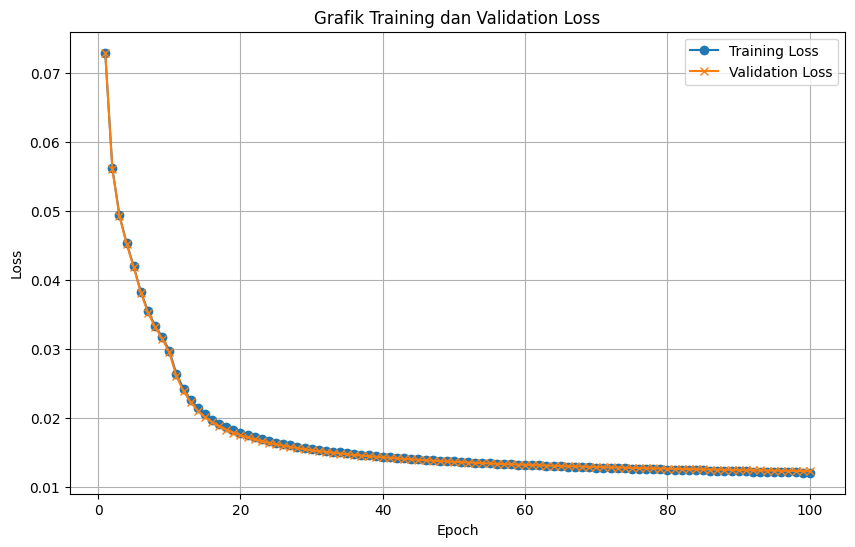

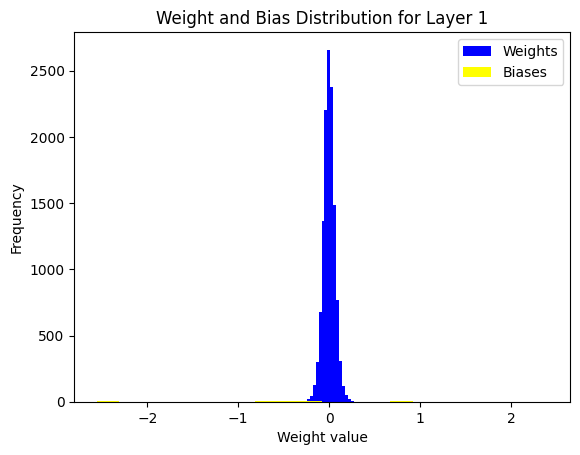

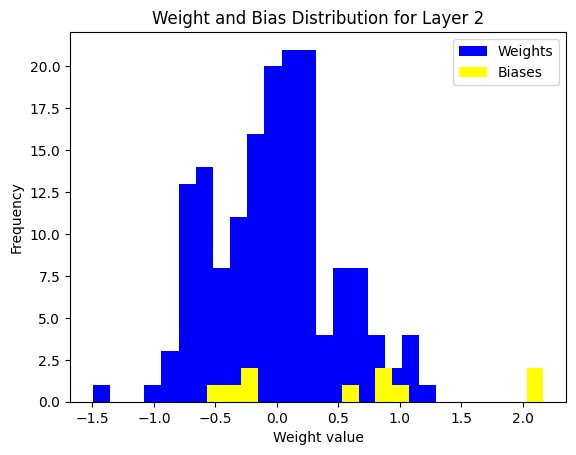

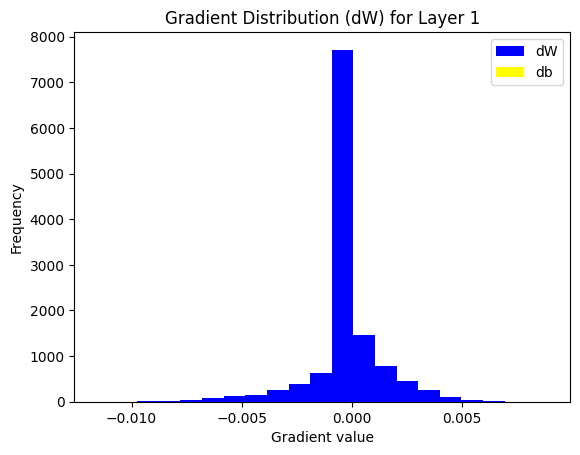

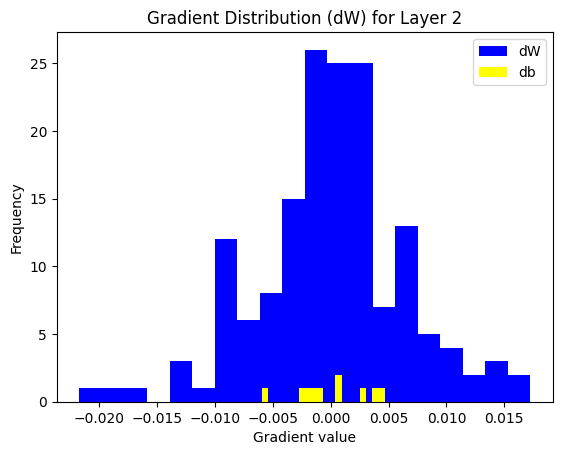

In [50]:
nn_model_he.plot_training_loss(history_he)
nn_model_he.plot_weight_distribution([0,1])
nn_model_he.plot_gradient_distribution([0,1])

# Analisis perbandingan hasil prediksi dengan library sklearn MLP

In [51]:
nn_model_best = NeuralNetwork(
    input_size=784,
    layers_config=[(128, 'relu'), (64, 'relu'), (10, 'softmax')],
    weight_init='xavier',
    weight_init_params={'seed': 42}
)
history_best = nn_model_best.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_best = nn_model_best.predict(X_val)
y_preds_best = np.argmax(y_preds_best,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_best)}')

Accuracy: 0.9504285714285714


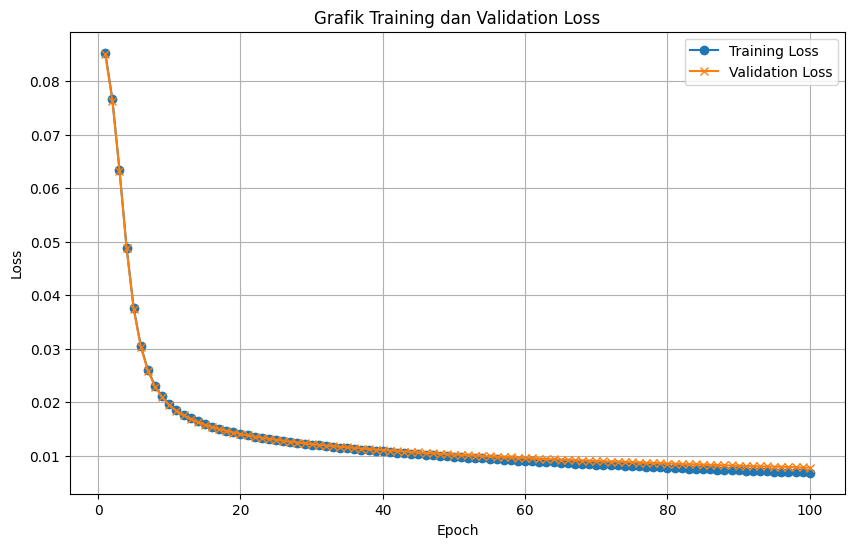

In [52]:
nn_model_best.plot_training_loss(history_best)

In [53]:
sk_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    alpha=0.0,
    batch_size=128,
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
sk_model.fit(X_train, y_train_raw)
sk_preds = sk_model.predict(X_val)
sk_acc = accuracy_score(y_val_raw, sk_preds)
print(f"sklearn MLPClassifier Accuracy: {sk_acc:.4f}")

sklearn MLPClassifier Accuracy: 0.9718


# Eksperimen model tanpa regularisasi, dengan regularisasi L1, dan dengan regularisasi L2

In [54]:
def evaluate_model_accuracy(model, X_val, y_val):
    y_preds = model.predict(X_val)
    y_preds = np.argmax(y_preds, axis=1) 
    y_true = np.argmax(y_val, axis=1)

    accuracy = accuracy_score(y_true, y_preds)

    return accuracy

In [55]:
# Eksperimen Model Tanpa Regularisasi
model_no_reg = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization=None,
    reg_lambda=0.0
)
history_no_reg = model_no_reg.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.2959462551896452, Val Loss: 2.295879461006696
Epoch 2/50, Train Loss: 2.2691307385092, Val Loss: 2.2694490206156734
Epoch 3/50, Train Loss: 2.1233864279944603, Val Loss: 2.1271935276657734
Epoch 4/50, Train Loss: 1.764407461081909, Val Loss: 1.7644899783413888
Epoch 5/50, Train Loss: 1.1899599720812595, Val Loss: 1.1883638402452739
Epoch 6/50, Train Loss: 0.7979069687615654, Val Loss: 0.7961436100084827
Epoch 7/50, Train Loss: 0.6173437220226476, Val Loss: 0.6151306094514226
Epoch 8/50, Train Loss: 0.5241410250142806, Val Loss: 0.5219674751871033
Epoch 9/50, Train Loss: 0.4707074635725392, Val Loss: 0.4684112667052506
Epoch 10/50, Train Loss: 0.43593802872860565, Val Loss: 0.4336928874303162
Epoch 11/50, Train Loss: 0.4100842930671905, Val Loss: 0.4081079166624021
Epoch 12/50, Train Loss: 0.39234538252611606, Val Loss: 0.39099307928869154
Epoch 13/50, Train Loss: 0.3778820357279051, Val Loss: 0.3769129814493098
Epoch 14/50, Train Loss: 0.3654694916722856, Val 

In [56]:
# Eksperimen Model dengan Regularisasi L1
model_L1 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization='L1',
    reg_lambda=0.001  # Regularisasi L1 dengan lambda kecil
)
history_L1 = model_L1.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.3020296638771964, Val Loss: 2.3019016590819454
Epoch 2/50, Train Loss: 2.301786581253438, Val Loss: 2.301618747180952
Epoch 3/50, Train Loss: 2.3016174121822033, Val Loss: 2.301417243222938
Epoch 4/50, Train Loss: 2.301500033730609, Val Loss: 2.3012742116082214
Epoch 5/50, Train Loss: 2.3014173621723937, Val Loss: 2.301168842924361
Epoch 6/50, Train Loss: 2.301357865652363, Val Loss: 2.3010896935755207
Epoch 7/50, Train Loss: 2.3013174580078744, Val Loss: 2.3010336864179886
Epoch 8/50, Train Loss: 2.3012879340230397, Val Loss: 2.30099150264485
Epoch 9/50, Train Loss: 2.3012678779091886, Val Loss: 2.3009618227834627
Epoch 10/50, Train Loss: 2.3012540524417577, Val Loss: 2.30094058550147
Epoch 11/50, Train Loss: 2.3012442265238935, Val Loss: 2.300924059164256
Epoch 12/50, Train Loss: 2.301237894441184, Val Loss: 2.3009121352093884
Epoch 13/50, Train Loss: 2.301232750388542, Val Loss: 2.3009043591478835
Epoch 14/50, Train Loss: 2.301229415245105, Val Loss: 2.3008

In [57]:
# Eksperimen Model dengan Regularisasi L2
model_L2 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization='L2',
    reg_lambda=0.001  # Regularisasi L2 dengan lambda kecil
)
history_L2 = model_L2.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.2963583434427797, Val Loss: 2.2962875029197805
Epoch 2/50, Train Loss: 2.273433726612948, Val Loss: 2.2736853239210864
Epoch 3/50, Train Loss: 2.1525022051614875, Val Loss: 2.1559599182365488
Epoch 4/50, Train Loss: 1.8544195973499438, Val Loss: 1.8557830575438135
Epoch 5/50, Train Loss: 1.32441625894433, Val Loss: 1.3223778048968995
Epoch 6/50, Train Loss: 0.8966486915035043, Val Loss: 0.8953456576423179
Epoch 7/50, Train Loss: 0.6845989970201353, Val Loss: 0.6827927464147342
Epoch 8/50, Train Loss: 0.5764757984595777, Val Loss: 0.5746910113496709
Epoch 9/50, Train Loss: 0.515490374146938, Val Loss: 0.5135160303473869
Epoch 10/50, Train Loss: 0.4769302311961591, Val Loss: 0.47489529225680815
Epoch 11/50, Train Loss: 0.44941040334232024, Val Loss: 0.4474479665665137
Epoch 12/50, Train Loss: 0.43065522520509025, Val Loss: 0.42919645001787604
Epoch 13/50, Train Loss: 0.4162100441798964, Val Loss: 0.41495530822582843
Epoch 14/50, Train Loss: 0.40446212220016126, 

In [58]:
accuracy_no_reg = evaluate_model_accuracy(model_no_reg, X_val, y_val)
accuracy_L1 = evaluate_model_accuracy(model_L1, X_val, y_val)
accuracy_L2 = evaluate_model_accuracy(model_L2, X_val, y_val)


print("Akurasi Model Tanpa Regularisasi:", accuracy_no_reg)
print("Akurasi Model dengan L1 Regularisasi:", accuracy_L1)
print("Akurasi Model dengan L2 Regularisasi:", accuracy_L2)

Akurasi Model Tanpa Regularisasi: 0.9354285714285714
Akurasi Model dengan L1 Regularisasi: 0.11428571428571428
Akurasi Model dengan L2 Regularisasi: 0.9262857142857143


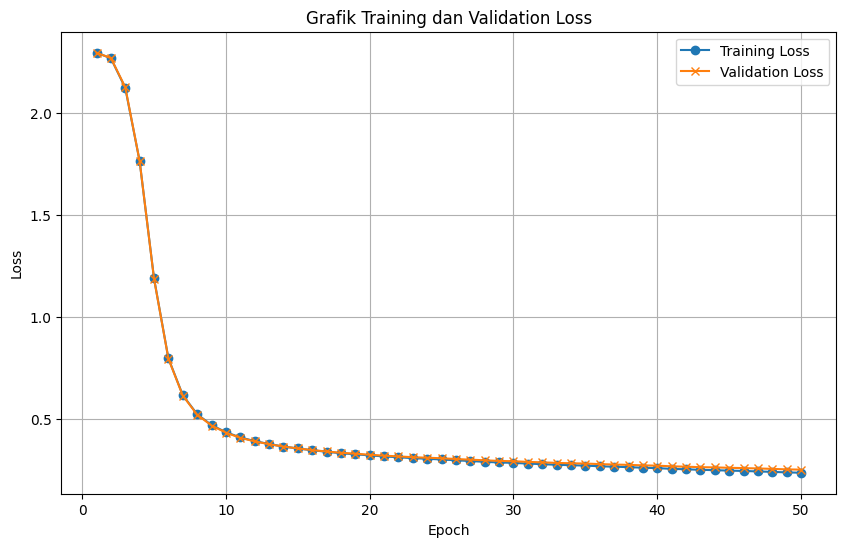

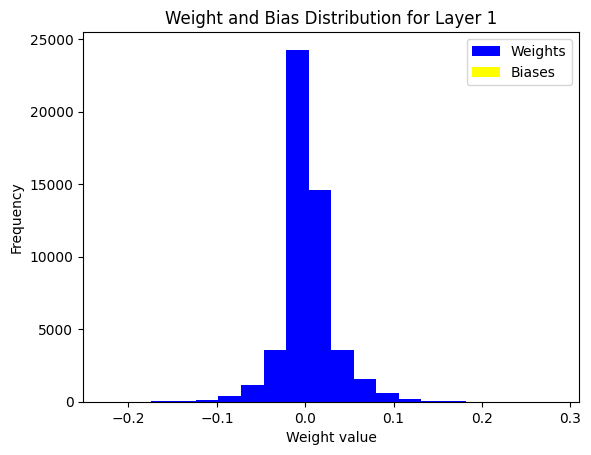

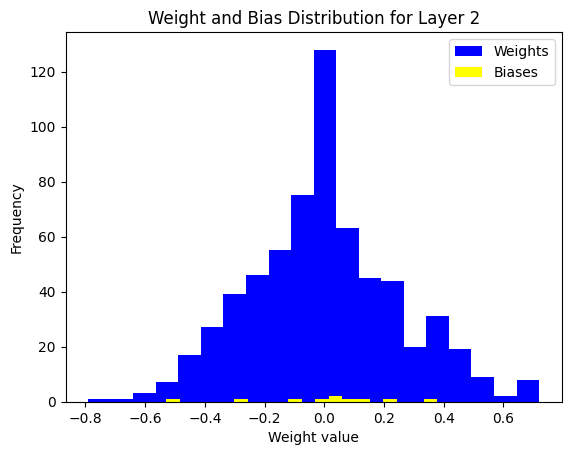

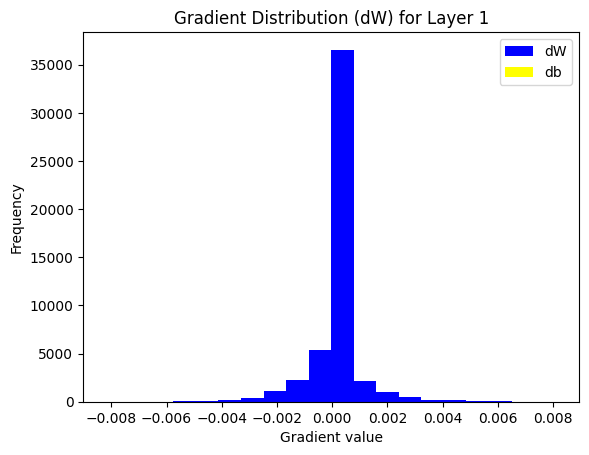

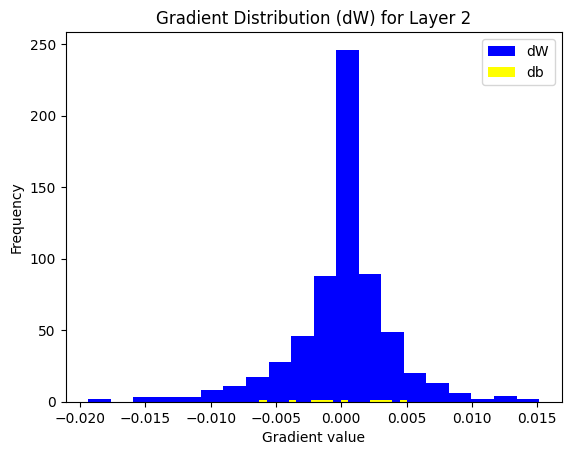

In [59]:
model_no_reg.plot_training_loss(history_no_reg)
model_no_reg.plot_weight_distribution([0,1])
model_no_reg.plot_gradient_distribution([0,1])

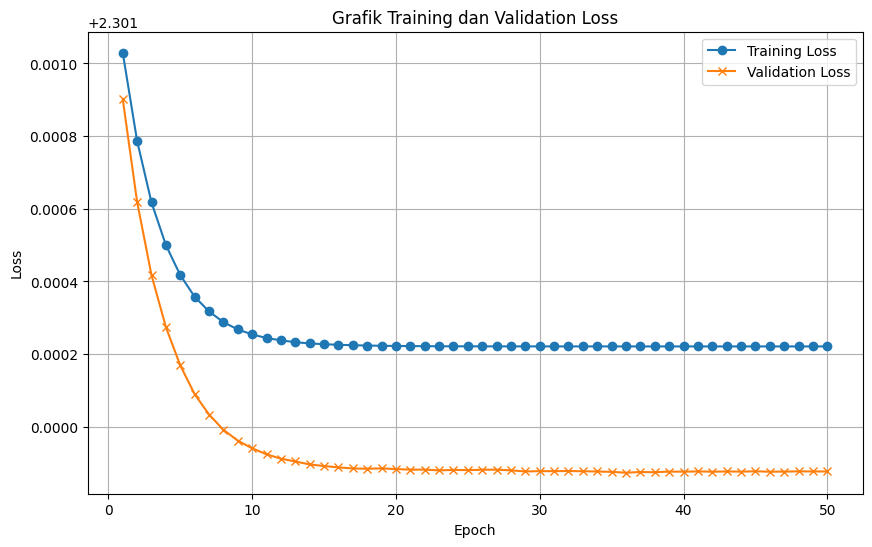

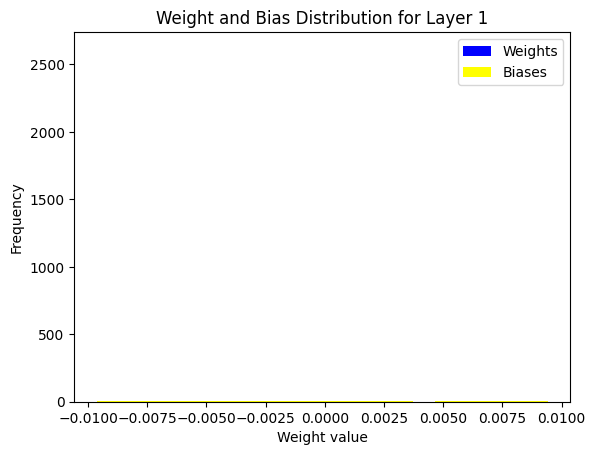

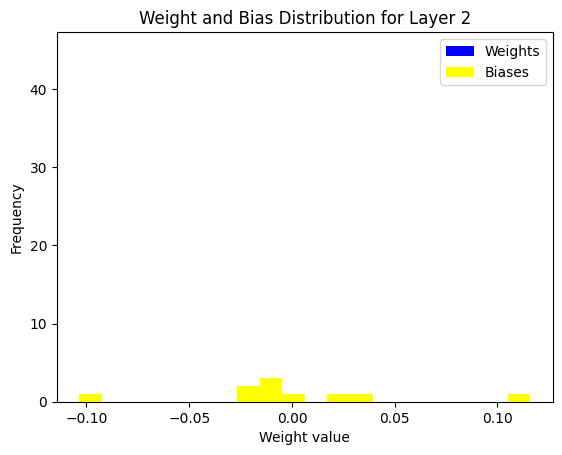

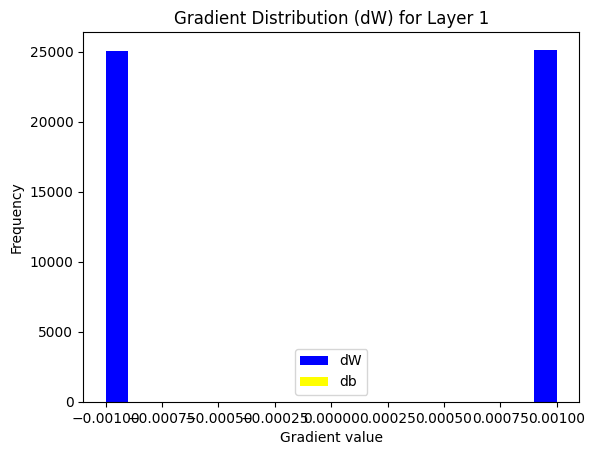

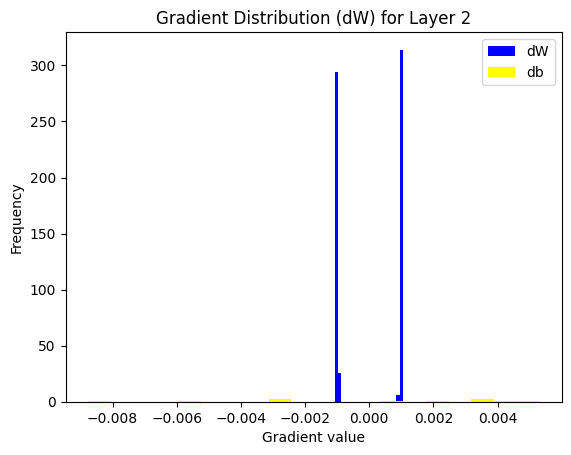

In [60]:
model_L1.plot_training_loss(history_L1)
model_L1.plot_weight_distribution([0,1])
model_L1.plot_gradient_distribution([0,1])

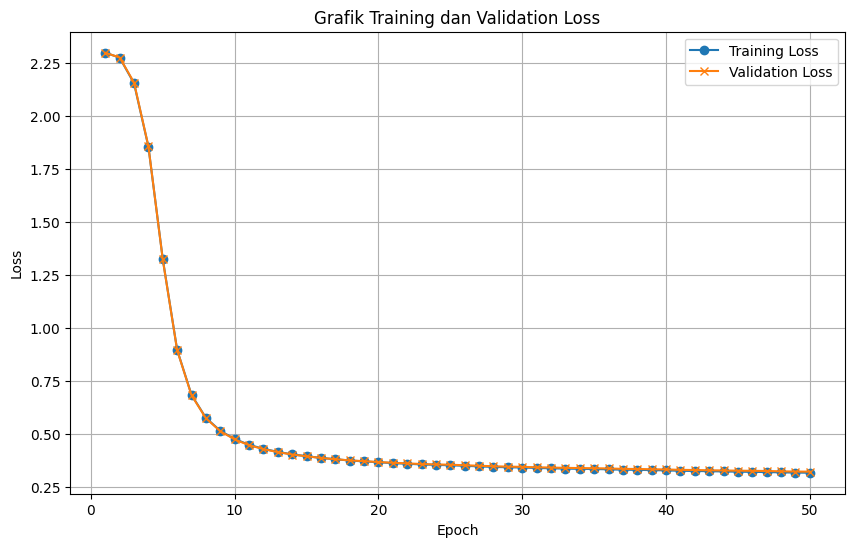

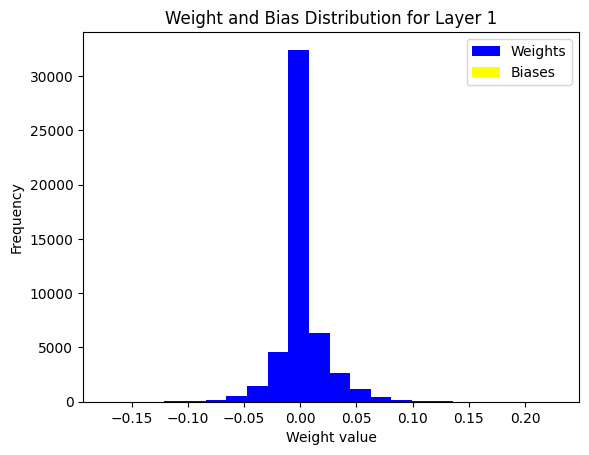

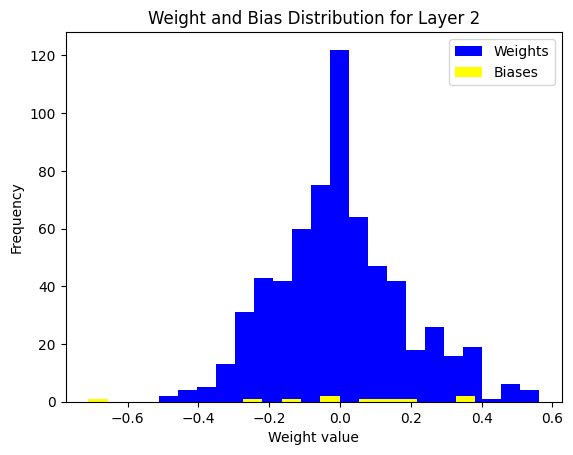

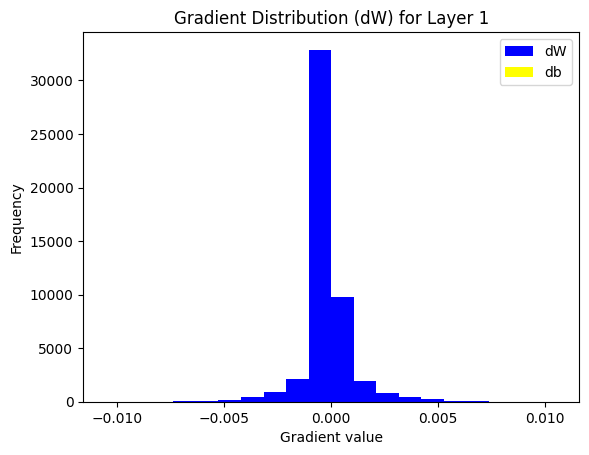

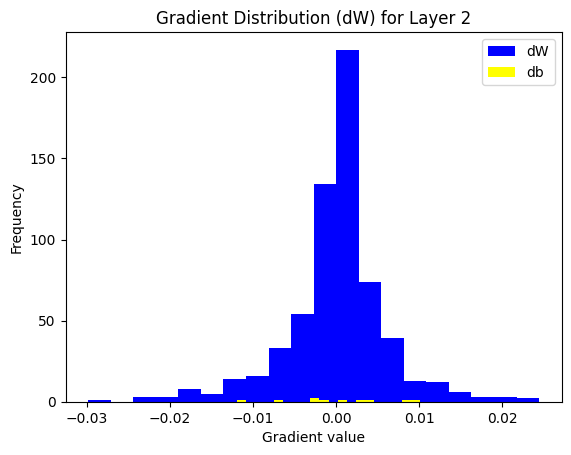

In [61]:
model_L2.plot_training_loss(history_L2)
model_L2.plot_weight_distribution([0,1])
model_L2.plot_gradient_distribution([0,1])

# Eskperimen model tanpa normalisasi dan dengan normalisasi.

In [62]:
# Eksperimen Model Tanpa Normalisasi
model_no_rms = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization=None,
    reg_lambda=0.0
)
history_no_rms = model_no_rms.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.2959462551896452, Val Loss: 2.295879461006696
Epoch 2/50, Train Loss: 2.2691307385092, Val Loss: 2.2694490206156734
Epoch 3/50, Train Loss: 2.1233864279944603, Val Loss: 2.1271935276657734
Epoch 4/50, Train Loss: 1.764407461081909, Val Loss: 1.7644899783413888
Epoch 5/50, Train Loss: 1.1899599720812595, Val Loss: 1.1883638402452739
Epoch 6/50, Train Loss: 0.7979069687615654, Val Loss: 0.7961436100084827
Epoch 7/50, Train Loss: 0.6173437220226476, Val Loss: 0.6151306094514226
Epoch 8/50, Train Loss: 0.5241410250142806, Val Loss: 0.5219674751871033
Epoch 9/50, Train Loss: 0.4707074635725392, Val Loss: 0.4684112667052506
Epoch 10/50, Train Loss: 0.43593802872860565, Val Loss: 0.4336928874303162
Epoch 11/50, Train Loss: 0.4100842930671905, Val Loss: 0.4081079166624021
Epoch 12/50, Train Loss: 0.39234538252611606, Val Loss: 0.39099307928869154
Epoch 13/50, Train Loss: 0.3778820357279051, Val Loss: 0.3769129814493098
Epoch 14/50, Train Loss: 0.3654694916722856, Val 

In [63]:
# Eksperimen Model Dengan Normalisasi RMS Norm
model_rms = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization=None,
    reg_lambda=0.0,
    use_rmsnorm=True
)
history_rms = model_rms.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 0.3027862802770938, Val Loss: 0.31917785499908924
Epoch 2/50, Train Loss: 0.23056238428101644, Val Loss: 0.2516738249412707
Epoch 3/50, Train Loss: 0.18593602556751132, Val Loss: 0.2155718500176214
Epoch 4/50, Train Loss: 0.1649296204032933, Val Loss: 0.19868287831982498
Epoch 5/50, Train Loss: 0.15175043691050635, Val Loss: 0.1937152370201664
Epoch 6/50, Train Loss: 0.14260306557724167, Val Loss: 0.18105953286978166
Epoch 7/50, Train Loss: 0.12277261905997365, Val Loss: 0.16228755885946078
Epoch 8/50, Train Loss: 0.116666140029096, Val Loss: 0.16247996321909372
Epoch 9/50, Train Loss: 0.10725481585477528, Val Loss: 0.1560206921021183
Epoch 10/50, Train Loss: 0.10037154738468228, Val Loss: 0.15066952985583015
Epoch 11/50, Train Loss: 0.10234847125676541, Val Loss: 0.15164003604323723
Epoch 12/50, Train Loss: 0.0927628983110875, Val Loss: 0.14583031170188135
Epoch 13/50, Train Loss: 0.08671245425705489, Val Loss: 0.1440158522675309
Epoch 14/50, Train Loss: 0.0837

In [64]:
# accuracy_no_rms = evaluate_model_accuracy(model_no_rms, X_val, y_val)
accuracy_rms = evaluate_model_accuracy(model_rms, X_val, y_val)

# print("Akurasi Model Tanpa Normalisasi:", accuracy_no_rms)
print("Akurasi Model dengan RMS Norm:", accuracy_rms)

Akurasi Model dengan RMS Norm: 0.9711428571428572


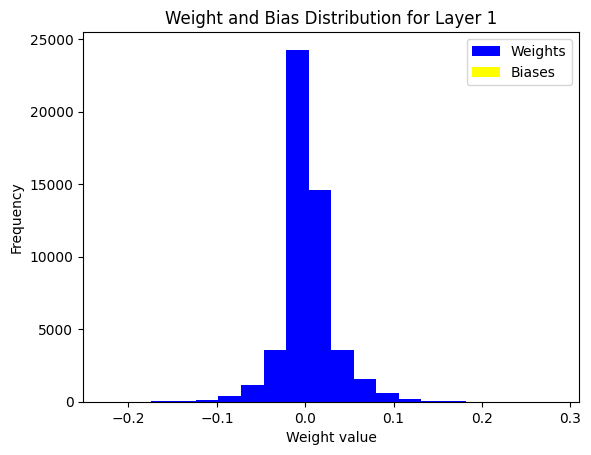

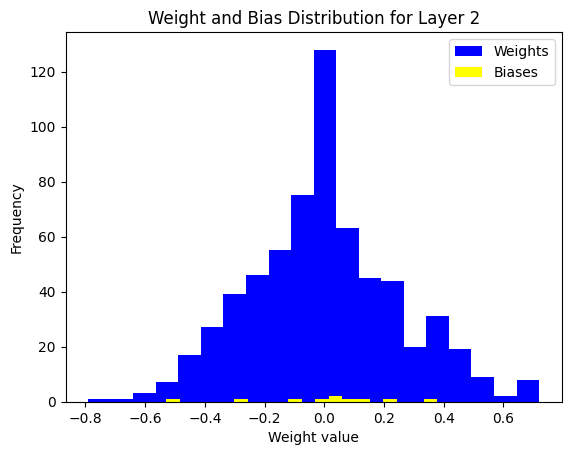

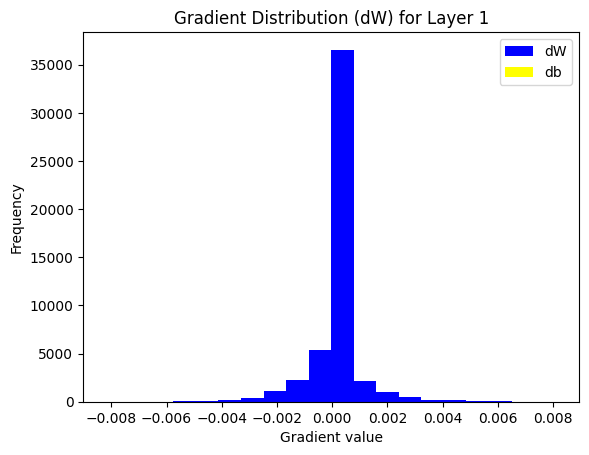

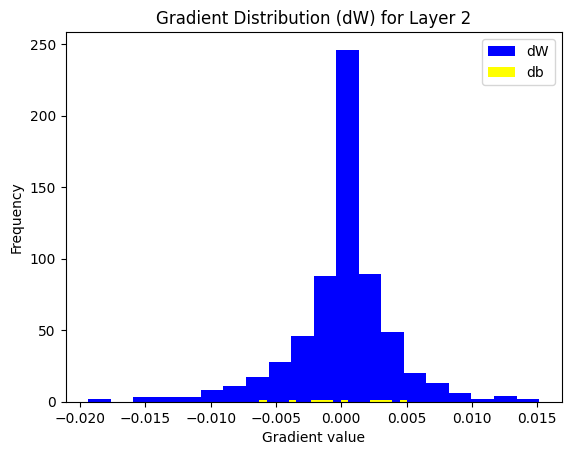

In [65]:
model_no_rms.plot_weight_distribution([0,1])
model_no_rms.plot_gradient_distribution([0,1])

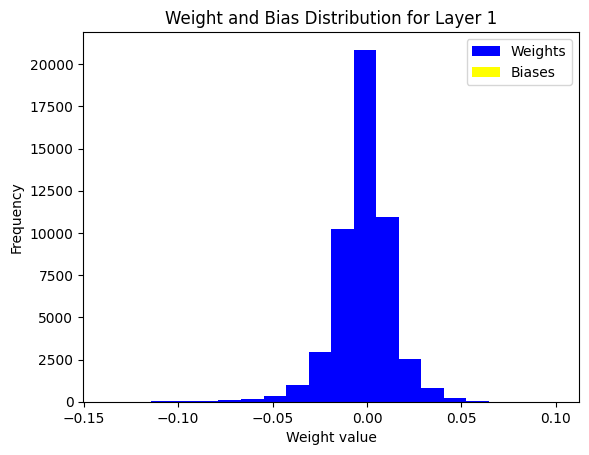

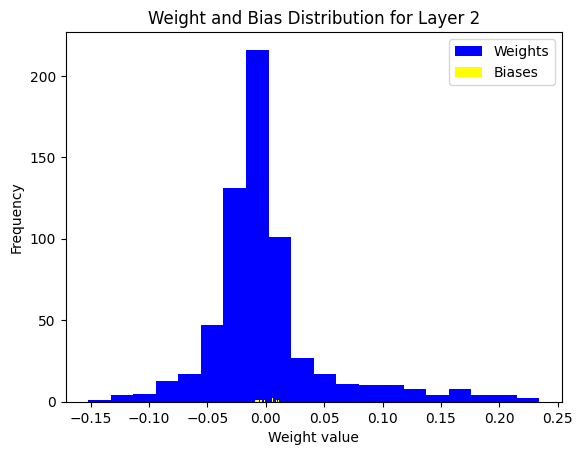

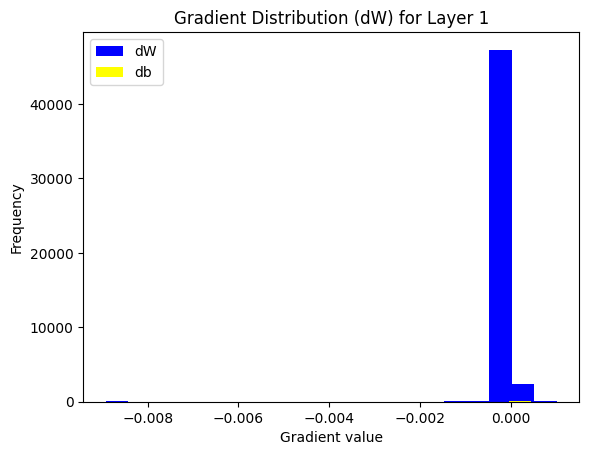

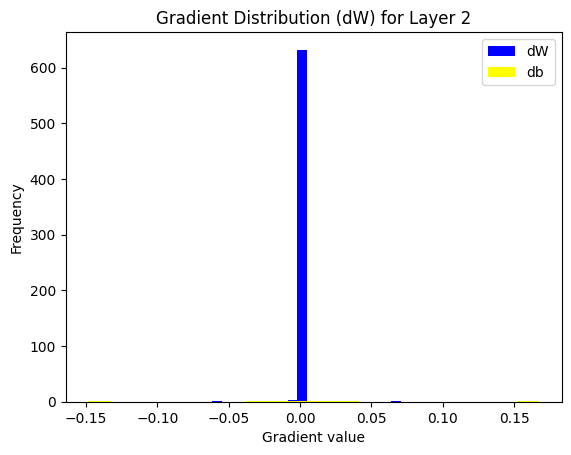

In [66]:
model_rms.plot_weight_distribution([0,1])
model_rms.plot_gradient_distribution([0,1])